In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('/fast/groups/ag_kircher/work/MisLa/MisLaReview')

import seaborn as sns

sns.set_palette('Set2')

zero = sns.color_palette("Set2", 8)[0]
one = sns.color_palette("Set2", 8)[1]
two = sns.color_palette("Set2", 8)[2]

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.patches as mpatches


import os
#os.chdir('/fast/work/groups/ag_kircher/ReMM/MA_Lusi/Snakemake')
pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 300)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load data

### Read part of the data

In [3]:

COLS = ["Index","Status","True Positive","False Positive", "True Negative", "False Negative", "Execution Time","Precision","Recall",
"F-score", "Extra Info"] #	NoiseInd	FoundNoiseInd	Time


noiseType = ["Sym","Asym","Real"]
noiseType = ["Sym"]

datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal", "RNA0", "RNA1", "RNA2",
           "HEPMASS","Pokerhand", "IFD"]
#datasets = ["HEPMASS","Pokerhand", "IFD"]

#datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal","EncodeArt","EncodeReal"]
imps = ['Python','CleanLab','R', 'DNN']
#imps = ['DNN']

dfs = pd.DataFrame()
for imp in imps:
    #print(imp)
    for name in datasets[:]:

       # print(name)
        file='output/'+name+'_'+imp+'.csv'
       # print(file)
        df_raw = pd.read_csv(file, sep = '\t',header = None)
        df = df_raw.copy()
        #display(df.head())
        df[0] = df[0].str.replace('\'','')
        df.columns = COLS
        cols = ['Dataset','Model','NoiseLevel','NoiseType','DatasetSize', 'Sample']
        df[cols] = df['Index'].str.replace(' ','').str.split('\[|]|,',expand= True).iloc[:,1:-1]
        dfs = pd.concat([dfs,df],axis = 0)
        #dfs = dfs.append(df)

## delete 0.0 Noise since precision and recall are not defined
print(dfs.shape)
dfs_raw = dfs  
dfs  = dfs[dfs['Status']!='F']
dfs = dfs[dfs['DatasetSize']!='1000000']
print(dfs.shape)
dfs = dfs[dfs['Model']!='AE']
dfs = dfs.reset_index(drop = True)



(433933, 17)
(423878, 17)


In [ ]:
### plot ERL losses

In [ ]:
#dfs = dfs[~((dfs['Dataset'].isin(["Magic",'DryBean','IFD', 'Adult']))&(dfs['Model']=='ERL')
#            &(~dfs['Extra Info'].str.contains('loss',na = False)))]



test = dfs[((dfs['Dataset'].isin(["DryBean"]))&(dfs['Model']=='ERL'))]
#test = test[test['Extra Info'].str.contains('learningRate')]
#test = test[test['Extra Info'].str.contains('los')]
test#.shape

metrics = test['Extra Info'].str.split(':',expand = True)[6].reset_index()


for i in range(len(metrics[:100])):
    n = metrics.iloc[i,0]
    #print(dfs.iloc[n:n+1,:])
    pd.DataFrame(eval(metrics.iloc[i,1]),columns = ['train_loss', 'test_loss', 'train_acc', 'test_acc']).plot()

### Read extended the data (usually do not run)

In [9]:

COLS = ["Index","Status","True Positive","False Positive", "True Negative", "False Negative", "Execution Time","Precision","Recall",
"F-score", "Extra Info", 'NoiseInd','FoundNoiseInd','Time']


noiseType = ["Sym","Asym","Real"]

datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal", "RNA0", "RNA1", "RNA2"]
#datasets = ["Magic","ClinVarArt", "RNA0", "RNA1", "RNA2"]

#datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal","EncodeArt","EncodeReal"]
imps = ['Python','CleanLab','R', 'DNN']
imps = ['DNN']

dfs = pd.DataFrame()
for imp in imps:
    #print(imp)
    for name in datasets[:]:

       # print(name)
        file='output/'+name+'_'+imp+'_Extended.csv'
       # print(file)
        df_raw = pd.read_csv(file, sep = '\t',header = None)
        df_raw = df_raw.dropna(how = 'all',axis = 1)
        df = df_raw.copy()
        #display(df.head())
        df[0] = df[0].str.replace('\'','')
        df.columns = COLS
        cols = ['Dataset','Model','NoiseLevel','NoiseType','DatasetSize', 'Sample']
        df[cols] = df['Index'].str.replace(' ','').str.split('\[|]|,',expand= True).iloc[:,1:-1]
        dfs = pd.concat([dfs,df],axis = 0)
        #dfs = dfs.append(df)

## delete 0.0 Noise since precision and recall are not defined
print(dfs.shape)
dfs_raw = dfs  
dfs  = dfs[dfs['Status']!='F']
dfs = dfs[dfs['DatasetSize']!='1000000']
print(dfs.shape)
dfs = dfs[dfs['Model']!='AE']
dfs = dfs.reset_index(drop = True)



(32612, 20)
(32611, 20)


In [184]:
dfs.groupby('DatasetSize').mean()#.sort_values()

True Positive  False Positive  True Negative  False Negative  \
DatasetSize                                                                 
100                 34.170          21.766         32.676          11.388   
300                100.387          65.756         97.744          36.113   
500                164.950         110.496        162.004          62.550   
1000               324.105         222.839        322.161         130.895   
3000               946.832         678.327        956.673         418.168   
5000              1553.905        1134.935       1590.065         721.095   
10000             3050.225        2284.007       3165.993        1499.775   

             Execution Time  Precision  Recall  F-score           Time  \
DatasetSize                                                              
100                   5.468      0.566   0.719    0.588 1670504809.478   
300                   6.814      0.548   0.684    0.568 1670504843.227   
500                   8.498      0.538   0.664    0.556 1670504820.053   
1000                 11.879      0.526   0.642    0.542 1670504807.746   
3000                 23.416      0.511   0.613    0.523 1670506661.059   
5000                 36.369      0.504   0.598    0.513 1670506690.142   
10000                65.604      0.495   0.580    0.501 1670506793.462   

             NoiseLevel  Sample  Precision over Noise  RecallOverNoise  \
DatasetSize                                                              
100               0.456   1.999                 0.110            0.264   
300               0.455   2.000                 0.093            0.229   
500               0.455   2.000                 0.083            0.209   
1000              0.455   2.000                 0.071            0.187   
3000              0.455   2.000                 0.056            0.158   
5000              0.455   2.000                 0.049            0.143   
10000             0.455   2.000                 0.040            0.125   

             Accuracy  Subjective noise level  Cost  Cost-mod   FPR   TPR  \
DatasetSize                                                                 
100             0.668                   0.559 0.789     3.415 0.427 0.566   
300             0.660                   0.554 0.800     3.489 0.442 0.548   
500             0.654                   0.551 0.814     3.586 0.453 0.538   
1000            0.646                   0.547 0.837     3.769 0.464 0.526   
3000            0.635                   0.542 0.870     3.988 0.477 0.511   
5000            0.629                   0.538 0.884     4.086 0.482 0.504   
10000           0.622                   0.533 0.905     4.219 0.488 0.495   

             F-score-mod   PLR  PLR-Inv  
DatasetSize                              
100                1.732 1.977    1.578  
300                1.606 1.591    1.526  
500                1.540 1.452    1.542  
1000               1.472 1.378    1.614  
3000               1.390 1.311    1.718  
5000               1.347 1.254    1.736  
10000              1.293 1.182    1.779

In [185]:
dfs

Index Status  True Positive  False Positive  \
0       [Adult, ERL, 0.5, Sym, 100, 0]      S             42              32   
1       [Adult, ERL, 0.5, Sym, 100, 1]      S             13              10   
2       [Adult, ERL, 0.5, Sym, 100, 2]      S             13               9   
3       [Adult, ERL, 0.5, Sym, 100, 3]      S             14              12   
4       [Adult, ERL, 0.5, Sym, 100, 4]      S             13              11   
...                                ...    ...            ...             ...   
14741  [RNA2, ERL, 0.2, Sym, 10000, 0]      S            706            2917   
14742  [RNA2, ERL, 0.2, Sym, 10000, 1]      S            747            2883   
14743  [RNA2, ERL, 0.2, Sym, 10000, 2]      S            728            2936   
14744  [RNA2, ERL, 0.2, Sym, 10000, 3]      S            742            2927   
14745  [RNA2, ERL, 0.2, Sym, 10000, 4]      S            741            2950   

       True Negative  False Negative  Execution Time  Precision  Recall  \
0                 18               8           4.416      0.568   0.840   
1                 40              37           4.261      0.565   0.260   
2                 41              37           3.981      0.591   0.260   
3                 38              36           4.331      0.538   0.280   
4                 39              37           4.500      0.542   0.260   
...              ...             ...             ...        ...     ...   
14741           5083            1294          41.424      0.195   0.353   
14742           5117            1253          41.620      0.206   0.373   
14743           5064            1272          41.471      0.199   0.364   
14744           5073            1258          41.476      0.202   0.371   
14745           5050            1259          40.746      0.201   0.370   

       F-score  Extra Info                                           NoiseInd  \
0        0.677  beta : 0.6  [0, 1, 4, 6, 7, 9, 10, 13, 17, 18, 19, 21, 22,...   
1        0.356  beta : 0.6  [0, 1, 4, 6, 7, 9, 10, 13, 17, 18, 19, 21, 22,...   
2        0.361  beta : 0.6  [0, 1, 4, 6, 7, 9, 10, 13, 17, 18, 19, 21, 22,...   
3        0.368  beta : 0.6  [0, 1, 4, 6, 7, 9, 10, 13, 17, 18, 19, 21, 22,...   
4        0.351  beta : 0.6  [0, 1, 4, 6, 7, 9, 10, 13, 17, 18, 19, 21, 22,...   
...        ...         ...                                                ...   
14741    0.251  beta : 0.6  [3, 4, 6, 12, 13, 14, 20, 29, 45, 47, 54, 60, ...   
14742    0.265  beta : 0.6  [3, 4, 6, 12, 13, 14, 20, 29, 45, 47, 54, 60, ...   
14743    0.257  beta : 0.6  [3, 4, 6, 12, 13, 14, 20, 29, 45, 47, 54, 60, ...   
14744    0.262  beta : 0.6  [3, 4, 6, 12, 13, 14, 20, 29, 45, 47, 54, 60, ...   
14745    0.260  beta : 0.6  [3, 4, 6, 12, 13, 14, 20, 29, 45, 47, 54, 60, ...   

                                           FoundNoiseInd           Time  \
0      [0, 1, 2, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, ... 1670500961.960   
1      [0, 6, 8, 11, 16, 19, 21, 32, 39, 47, 48, 49, ... 1670500966.242   
2      [2, 3, 4, 6, 11, 15, 17, 18, 27, 28, 30, 31, 3... 1670500970.243   
3      [4, 5, 14, 15, 17, 20, 21, 24, 25, 26, 28, 29,... 1670500974.594   
4      [1, 8, 13, 15, 22, 24, 25, 28, 32, 33, 38, 43,... 1670500979.115   
...                                                  ...            ...   
14741  [2, 3, 7, 8, 9, 11, 20, 24, 25, 27, 28, 30, 32... 1670510766.641   
14742  [0, 2, 6, 8, 9, 10, 28, 31, 32, 33, 34, 35, 40... 1670510808.466   
14743  [0, 3, 6, 9, 10, 15, 17, 18, 19, 28, 31, 32, 3... 1670510850.141   
14744  [1, 3, 6, 7, 8, 9, 10, 11, 18, 19, 24, 27, 29,... 1670510891.818   
14745  [0, 13, 16, 17, 19, 20, 21, 25, 33, 34, 42, 43... 1670510932.761   

      Dataset Model  NoiseLevel NoiseType  DatasetSize  Sample   Group  \
0       Adult   ERL       0.500       Sym          100       0  Single   
1       Adult   ERL       0.500       Sym          100       1  Single   
2       Adult   ERL       0.500       Sym          100       2  Single   
3

### Add info about models

In [88]:

#dfs[dfs.duplicated(keep = False)]

In [130]:
dfs['Model'].value_counts()

ERL                        39243
RkDN                       22176
KDN                        22117
IH                         22088
AENN                       22059
PD                         21935
RFD                        21554
FKDN                       21552
CleanLab                   21432
MCS                        21387
CVCF                       17086
IPF                        16967
CNN                        16896
C45iteratedVotingFilter    16875
C45votingFilter            16810
C45robustFilter            16688
HARF                       16550
ORBoostFilter              16500
BBNR                       16446
Name: Model, dtype: int64

In [132]:
pd.crosstab(dfs['Model'],dfs['Status'], normalize = 'index') 

Status                      N     S
Model                              
AENN                    0.000 1.000
BBNR                    0.000 1.000
C45iteratedVotingFilter 0.007 0.993
C45robustFilter         0.000 1.000
C45votingFilter         0.008 0.992
CNN                     0.000 1.000
CVCF                    0.012 0.988
CleanLab                0.000 1.000
ERL                     0.000 1.000
FKDN                    0.001 0.999
HARF                    0.000 1.000
IH                      0.000 1.000
IPF                     0.000 1.000
KDN                     0.000 1.000
MCS                     0.000 1.000
ORBoostFilter           0.499 0.501
PD                      0.000 1.000
RFD                     0.000 1.000
RkDN                    0.000 1.000

In [24]:
#dfs[(dfs['Model']=='edgeBoostFilter')&(dfs['Status']=='S')]['Dataset'].value_counts()
#dfs[dfs['Model']=='ERL']#['Status'].value_counts()

In [6]:
usedModels = dfs['Model'].unique()

models = [
    "KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD",
        'C45votingFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 
          'CNN', 'C45robustFilter', 'HARF', 'BBNR', 
    'ORBoostFilter',
            'AENN',"CleanLab","ERL", "AE" ]

print(set(usedModels)- set(usedModels).intersection(set(models)))
dfs = dfs[dfs['Model'].isin(models)].reset_index(drop = True)
print(dfs['Model'].unique().shape)



## read in the model file 

mod = pd.read_csv('figures/models.txt',sep = '\t')
groups = ['Similarity','Ensemble','Single']
#drop = ['saturationFilter', 'classifSF', 'DROP1', 'DROP2',
#                                 'DROP3', 'EWF', 'TomekLinks','consensusSF','INFFC','ModeFilter', 'ENG','edgeBoostFilter']
#mod = mod[~mod['Abbreviation'].isin(drop)]
mod = mod[mod['Abbreviation'].isin(models)]

di = mod[['Abbreviation','Group']].set_index('Abbreviation').to_dict()['Group']

dfs['Group'] = dfs['Model']
dfs['Group'] = dfs['Group'].replace(di)


## add the implementaion dictionary for models
repl = {'Tensorflow':'DNN',
'GitHub':'DNN' ,
'Scikit-Clean':'Python',
'NoiseFiltersR':'R'}
mod['Implementation'] = mod['Package'].replace(repl)
repl = mod[['Abbreviation','Implementation']].set_index('Abbreviation').to_dict()['Implementation']




set()
(19,)


#### Optional

In [116]:
## for slides ## wrong abbriviations 
allModels = pd.read_csv('figures/models.txt',sep = '\t')
usedModels = pd.Series(dfs['Model'].unique())
diff = allModels[~allModels['Abbreviation'].isin(usedModels)]['Abbreviation'].sort_values().to_list()
print('Excluded models: ', ', '.join(diff))


Excluded models:  AE, DROP1, DROP2, DROP3, EF, ENG, EWF, GE, INFFC, ModeFilter, PF, PRISM, RNN, TomekLinks, classifSF, consensusSF, dynamicCF, edgeBoostFilter, hybridRepairFilter, saturationFilter


In [117]:
# checking the types of columns
d = dfs[dfs['NoiseLevel']==0.3]
d = d[d['DatasetSize']==100]
(d['True Positive']/(d['True Positive']+d['False Positive']))#.mean()


Series([], dtype: float64)

In [118]:
# check the number of runs of an arbitrary model
dfs['DatasetSize'].value_counts()
for model in models:
    a = dfs[dfs['Model'] == model]
    a = a[a['Dataset'] == 'Magic']

    df = a.pivot_table(values='Status', index='DatasetSize', columns='NoiseLevel', aggfunc='count')
    display(df)

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   26   26
1000           28   28   28   28   28   28   28   28   28   26
10000          24   24   24   24   24   24   24   25   20   20
300            28   28   28   28   28   28   28   28   26   28
3000           28   28   28   28   28   28   28   28   24   28
500            28   28   28   28   28   28   28   28   24   24
5000           24   24   24   24   24   24   26   25   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            26   28   28   28   28   28   28   28   26   26
1000           28   28   28   28   28   28   28   28   24   26
10000          24   25   25   24   26   25   24   24   20   20
300            28   28   28   28   28   28   28   28   24   26
3000           28   28   28   28   28   28   28   28   26   26
500            28   28   28   28   28   28   28   28   26   24
5000           24   24   24   24   26   24   24   25   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   24   26
1000           28   28   28   28   28   28   28   28   24   28
10000          26   24   25   25   24   24   24   24   20   20
300            28   28   28   28   28   28   28   28   26   24
3000           28   28   28   28   28   28   28   28   26   26
500            28   28   28   28   28   28   28   28   28   24
5000           24   25   25   25   26   24   24   24   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   28   26
1000           28   28   28   28   28   28   28   28   26   24
10000          25   24   26   25   24   24   26   24   20   20
300            28   28   28   28   28   28   28   28   28   28
3000           28   28   28   28   28   28   28   28   28   26
500            28   28   28   28   28   28   28   28   26   28
5000           25   24   26   24   25   26   24   24   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   26   28
1000           28   28   28   28   28   28   28   28   28   28
10000          24   25   24   24   25   24   25   24   20   20
300            28   28   28   28   28   28   28   28   24   24
3000           28   28   28   28   28   28   28   28   24   24
500            28   28   28   28   28   28   28   28   26   26
5000           25   24   26   25   24   26   25   24   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   26   26
1000           28   28   28   28   28   28   28   28   28   26
10000          26   25   24   24   25   24   25   25   20   20
300            28   28   28   28   28   28   28   28   28   26
3000           28   28   28   28   28   28   28   28   28   26
500            28   28   28   28   28   28   28   28   28   26
5000           26   25   25   25   24   24   24   25   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   24   26
1000           28   28   28   28   28   28   28   28   26   26
10000          24   24   24   24   26   24   25   25   20   20
300            28   28   28   28   28   28   28   28   28   28
3000           28   28   28   28   28   28   28   28   28   28
500            28   28   28   28   28   28   28   28   28   26
5000           24   25   24   24   25   24   25   25   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   24   26
1000           28   28   28   28   28   28   28   28   28   26
10000          25   26   24   24   24   24   24   24   26   26
300            28   28   28   28   28   28   28   28   26   26
3000           28   28   28   28   28   28   28   28   26   28
500            28   28   28   28   28   28   28   28   26   24
5000           25   24   24   25   24   24   25   24   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   24   26
1000           28   28   28   28   28   28   28   28   24   26
10000          25   24   24   24   24   24   24   24   26   26
300            28   28   28   28   28   28   28   28   26   26
3000           28   28   28   28   28   28   28   28   24   28
500            28   28   28   28   28   28   28   28   26   28
5000           24   24   24   26   24   24   24   25   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   28   28
1000           28   28   28   28   28   28   28   28   26   28
10000          25   24   24   26   25   25   25   25   26   26
300            28   28   28   28   28   28   28   28   26   26
3000           28   28   28   28   28   28   28   28   26   26
500            28   28   28   28   28   28   28   28   26   26
5000           25   24   26   24   24   26   24   24   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   24   28
1000           28   28   28   28   28   28   28   28   26   28
10000          24   26   25   24   25   24   25   25   26   26
300            28   28   28   28   28   28   28   28   26   24
3000           28   28   28   28   28   28   28   28   28   24
500            28   28   28   28   28   28   28   28   26   26
5000           26   24   26   25   25   25   24   24   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   26   26
1000           28   28   28   28   28   28   28   28   24   28
10000          25   24   24   26   24   25   26   26   26   26
300            28   28   28   28   28   28   28   28   28   26
3000           28   28   28   28   28   28   28   28   28   24
500            28   28   28   28   28   28   28   28   26   28
5000           24   24   24   24   24   26   25   25   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   28   28
1000           28   28   28   28   28   28   28   28   26   24
10000          24   25   24   24   24   24   24   24   26   26
300            28   28   28   28   28   28   28   28   26   28
3000           28   28   28   28   28   28   28   28   26   24
500            28   28   28   28   28   28   28   28   24   26
5000           24   24   24   25   24   24   24   24   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   28   26
1000           28   28   28   28   28   28   28   28   26   24
10000          24   24   24   25   26   25   24   25   26   26
300            28   28   28   28   28   28   28   28   26   24
3000           28   28   28   28   28   28   28   28   28   24
500            28   28   28   28   28   28   28   28   24   26
5000           25   24   25   26   24   26   25   25   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   28   24
1000           28   28   28   28   28   28   28   28   28   26
10000          24   24   24   24   24   24   24   24   26   26
300            28   28   28   28   28   28   28   28   26   28
3000           28   28   28   28   28   28   28   28   24   28
500            28   28   28   28   28   28   28   28   26   24
5000           24   25   24   24   24   24   24   24   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            26   26   26   26   26   26   26   26   24   26
1000           26   26   26   26   26   26   26   26   28   24
10000          26   24   24   26   24   24   25   24   26   26
300            26   26   26   26   26   26   26   26   26   28
3000           26   26   26   26   26   26   26   26   24   26
500            26   26   26   26   26   26   26   26   26   24
5000           24   24   26   24   24   24   24   24   26   26

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   24   24
1000           28   28   28   28   28   28   28   28   24   24
10000          25   25   24   24   24   24   25   25   36   36
300            28   28   28   28   28   28   28   28   28   28
3000           28   28   28   28   28   28   28   28   28   28
500            28   28   28   28   28   28   28   28   26   28
5000           25   24   25   24   24   24   26   24   36   36

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            28   28   28   28   28   28   28   28   26   24
1000           28   28   28   28   28   28   28   28   26   29
10000          24   26   24   25   25   24   25   24   20   20
300            28   28   28   28   28   28   28   28   26   28
3000           28   28   28   28   28   28   28   28   24   28
500            28   28   28   28   28   28   28   28   28   24
5000           26   25   24   26   24   25   24   24   20   20

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100            30   30   30   30   30   30   30   30   30   30
1000           30   30   30   30   30   30   30   30   30   30
10000          20   20   20   20   20   20   20   20   20   20
300            30   30   30   30   30   30   30   30   30   30
3000           20   20   20   20   20   20   20   20   20   20
500            30   30   30   30   30   30   30   30   30   30
5000           20   20   20   20   20   20   20   20   20   20

Empty DataFrame
Columns: []
Index: []

In [119]:
a = dfs[dfs['Model'] == 'CNN']
#a = a[a['Dataset'] == 'Magic']

df = a.pivot_table(values='Status', index='DatasetSize', columns='NoiseLevel', aggfunc='count')
display(df)

NoiseLevel   0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
DatasetSize                                                   
100           226  226  226  226  226  226  226  226  220  224
1000          226  226  226  226  226  226  226  226  212  228
10000         210  202  202  213  202  205  215  215  221  221
300           226  226  226  226  226  224  226  226  234  212
3000          226  226  226  226  226  226  226  226  234  206
500           226  226  226  226  226  226  226  226  214  230
5000          206  202  202  203  205  214  212  212  221  221

In [121]:
means = dfs.groupby(['Dataset','Model']).count()
means = dfs[dfs['Dataset']=='Magic'].groupby(['NoiseLevel','Model']).count()

#means#['Model'].unique().to_list()
8*7
df = means.pivot_table(values='Status', index='Model', columns='NoiseLevel', aggfunc='sum')
df


NoiseLevel               0.05  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Model                                                                     
AENN                      190  189  189  188  188  188  191  189  202  204
BBNR                      188  189  188  188  188  188  188  188  184  182
C45iteratedVotingFilter   190  188  190  190  189  191  189  189  184  186
C45robustFilter           188  189  188  189  188  188  188  188  182  182
C45votingFilter           190  190  188  189  188  188  189  188  182  182
CNN                       189  188  188  190  188  191  191  191  184  184
CVCF                      189  188  188  190  188  188  188  189  176  186
CleanLab                  190  191  188  191  189  189  189  188  170  173
ERL                       180  180  180  180  180  180  180  180  180  180
FKDN                      186  189  189  188  192  189  188  189  166  168
HARF                      189  188  189  191  190  191  189  190  184  176
IH                        192  190  189  189  189  188  189  190  178  170
IPF                       190  190  191  189  190  189  189  189  182  182
KDN                       188  188  188  188  188  188  190  190  168  172
MCS                       189  189  190  189  189  190  190  188  168  170
ORBoostFilter             180  178  180  180  178  178  179  178  180  180
PD                        190  188  192  189  189  190  190  188  176  172
RFD                       188  189  188  188  191  188  190  190  174  174
RkDN                      190  189  190  190  190  188  188  188  168  168

In [ ]:
# do not run
dfsBalanced = pd.DataFrame()
cols = ['Model','Dataset', 'DatasetSize','NoiseType', 'NoiseLevel']
a = dfs[dfs['NoiseType']!='Real'].set_index(cols)
for index, new_df in dfs.groupby(level=0):
    b = new_df.sample(n = 10)
    dfsBalanced = pd.concat([dfsBalanced,b], axis = 0)

#### Repeat missing runs (run the code only when needed)

In [4]:
cols = ['Model','Dataset', 'DatasetSize','NoiseType', 'NoiseLevel']

dfs['Model'] = dfs['Model'].astype('string')
dfs['Dataset'] = dfs['Dataset'].astype('string')
dfs['NoiseType'] = dfs['NoiseType'].astype('string')

dfs['DatasetSize'] = dfs['DatasetSize'].astype('int')

b = dfs[
        #((dfs['NoiseType']=='Real')&(dfs['Dataset'].isin(['ClinVarReal'])))
       #&
        (~dfs['DatasetSize'].isin([1000000]))]
#b = b[b['Model']=='AE']

b = b.groupby(cols).count()
repeat = 10 - b[b['Index']<10]['Index']

In [5]:
repeat#.median()

Series([], Name: Index, dtype: int64)

In [150]:
len(repeat)

0

In [9]:
repeat = repeat.reset_index()
repeat['Implementation'] = repeat['Model'].replace(repl)

In [10]:
repeat[repeat['Index']==10]

Empty DataFrame
Columns: [Model, Dataset, DatasetSize, NoiseType, NoiseLevel, Index, Implementation]
Index: []

In [11]:
repeat['NoiseType'].value_counts()

Sym     5
Asym    3
Name: NoiseType, dtype: Int64

In [12]:
repeat['string'] = ('temp/' + repeat['Dataset'] + '_' + repeat['NoiseLevel'].astype('string') + '_' 
          +  repeat['DatasetSize'] .astype('string') + '_' + repeat['NoiseType'] + '_' +  repeat['Model'] + '_' +
           +     repeat['Implementation'] + '.tmp')



In [ ]:
## does not really work because snakemake does not run identical runs many times
repeats = []
for i in range(len(repeat)):
    c = [repeat.loc[i,'string']]*repeat.loc[i,'Index']
    for cc in c:
        repeats.append(cc)

In [13]:
#pd.Series(repeats).to_csv('repeats.csv',index = False, header = False)

repeat['string'].to_csv('repeatsReal.csv',index = False, header = False)


In [ ]:
dfs.groupby(cols).count()

In [ ]:
dfs.groupby(level=[list(range(len(cols)))]).count()

In [ ]:
cols = ['Model','Dataset', 'DatasetSize','NoiseType', 'NoiseLevel']
a = dfs.set_index(cols)
a = dfs.set_index(cols)
a.index.unique()

In [ ]:
cols = ['NoiseLevel','Model','Dataset', 'NoiseType', 'NoiseLevel']
a = dfs.set_index(cols)
dfsBalanced = pd.DataFrame()
for index in a.index:
    b = a[a.index ==index].sample(n = 10)
    dfsBalanced = pd.concat([dfsBalanced,b], axis = 0)

In [ ]:
dfsBalanced.shape

In [ ]:
dfs.sort_values(cols)

### Add new variables

In [27]:
to_replace = {'C45votingFilter':'C45vF',
'C45robustFilter':'C45rF',
'C45iteratedVotingFilter':'C45itF',
'ORBoostFilter':'ORBF'}
dfs['Model'] =  dfs['Model'].replace(to_replace)
mod['Abbreviation'] = mod['Abbreviation'].replace(to_replace)

In [28]:
                                  
#dfs = dfs[~dfs['NoiseLevel'].isin(to_remove)]
#dfs = dfs[dfs['Status']!='F']

dfs = dfs[~dfs['Dataset'].isin(['EncodeReal','EncodeArt'])]
dfs = dfs[~dfs['Model'].isin(['AE'])]

dfs['Model'].value_counts()

ERL         32611
AENN        15733
C45itF      15685
CVCF        15636
C45vF       15600
IPF         15533
C45rF       15528
CNN         15456
HARF        15440
BBNR        15376
PD          15305
IH          15295
RFD         15260
MCS         15235
CleanLab    15227
RkDN        15220
FKDN        15206
KDN         15206
ORBF        14933
Name: Model, dtype: int64

In [29]:
# change for less memory requirements
cols = [ 'True Positive', 'False Positive', 'True Negative',
       'False Negative','DatasetSize','Sample']
dfs[cols] = dfs[cols].astype('int')
cols = ['Precision', 'Recall', 'F-score','NoiseLevel','Execution Time']
dfs[cols] = dfs[cols].astype('float')


## adding new columns
pon = 'Precision over Noise'
dfs[pon] = dfs['Precision']-dfs['NoiseLevel']
dfs['RecallOverNoise'] = dfs['Recall']-dfs['NoiseLevel']
dfs['Accuracy'] =(dfs["True Positive"]+dfs['True Negative'])/dfs['DatasetSize'].astype(int)

#retrieved = 'Retrieved instances'
retrieved = 'Subjective noise level'

dfs[retrieved] = (dfs['True Positive'] + dfs['False Positive'])/dfs['DatasetSize'] 


### delete > 10000 FOR NOW
dfs =dfs[dfs['DatasetSize']!=1000000]

cost = 'Cost'
cost1 = 'Cost-mod'


dfs[cost] = dfs['False Positive']/(dfs['True Positive']+dfs['False Negative'])
dfs[cost] = dfs['False Positive']/(dfs['True Positive'])/dfs['NoiseLevel']
dfs[cost] = dfs[retrieved]/dfs['Recall']
dfs[cost1] = dfs[retrieved]/(dfs['Recall']*dfs['NoiseLevel'])


dfs.loc[dfs[cost]==np.inf,cost]=np.nan
dfs.loc[dfs[cost1]==np.inf,cost1]=np.nan



dfs['FPR'] = dfs['False Positive']/(dfs['False Positive']+dfs['True Negative'])
dfs['TPR'] = dfs['True Positive']/(dfs['True Positive']+dfs['False Positive'])

dfs['F-score-mod'] = dfs['F-score']/dfs['NoiseLevel']

dfs['PLR'] = dfs['TPR']/dfs['FPR']
dfs['PLR-Inv'] = dfs['FPR']/dfs['TPR']

for col in [cost, cost1, 'PLR', 'PLR-Inv']:
    dfs.loc[dfs[col]==np.inf,col]=np.nan

    
    

In [6]:
## to have the save proportion of parameters for all models
cols = ['Model','Dataset', 'DatasetSize','NoiseType', 'NoiseLevel']

dfs =  dfs.groupby(cols).sample(n = 10, replace = False)


In [7]:
pd.crosstab(dfs['Model'], dfs['DatasetSize'])

DatasetSize              100    300    500    1000   3000   5000   10000
Model                                                                   
AENN                      2300   2300   2300   2300   2300   2300   2300
BBNR                      2300   2300   2300   2300   2300   2300   2300
C45iteratedVotingFilter   2300   2300   2300   2300   2300   2300   2300
C45robustFilter           2300   2300   2300   2300   2300   2300   2300
C45votingFilter           2300   2300   2300   2300   2300   2300   2300
CNN                       2300   2300   2300   2300   2300   2300   2300
CVCF                      2300   2300   2300   2300   2300   2300   2300
CleanLab                  2300   2300   2300   2300   2300   2300   2300
ERL                       2280   2290   2300   2290   2290   2280   2290
FKDN                      2300   2300   2300   2300   2300   2300   2300
HARF                      2300   2300   2300   2300   2300   2300   2300
IH                        2300   2300   2300   2300   2300   2300   2300
IPF                       2300   2300   2300   2300   2300   2300   2300
KDN                       2300   2300   2300   2300   2300   2300   2300
MCS                       2300   2300   2300   2300   2300   2300   2300
ORBoostFilter             2300   2300   2300   2300   2300   2300   2300
PD                        2300   2300   2300   2300   2300   2300   2300
RFD                       2300   2300   2300   2300   2300   2300   2300
RkDN                      2300   2300   2300   2300   2300   2300   2300

### Critical Difference Diagrams 

In [224]:
import Orange 
import matplotlib.pyplot as plt


In [204]:
group = 'Similarity'
df = dfs[dfs['Group']  == group]
#df = dfs
score = 'F-score'


/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_642263/3193984968.py:20: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  cd = Orange.evaluation.compute_CD(avranks, len(d), alpha='0.05',
/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_642263/3193984968.py:27: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7


2.1467085944294064


/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_642263/3193984968.py:20: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  cd = Orange.evaluation.compute_CD(avranks, len(d), alpha='0.05',
/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_642263/3193984968.py:27: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7


2.1467085944294064


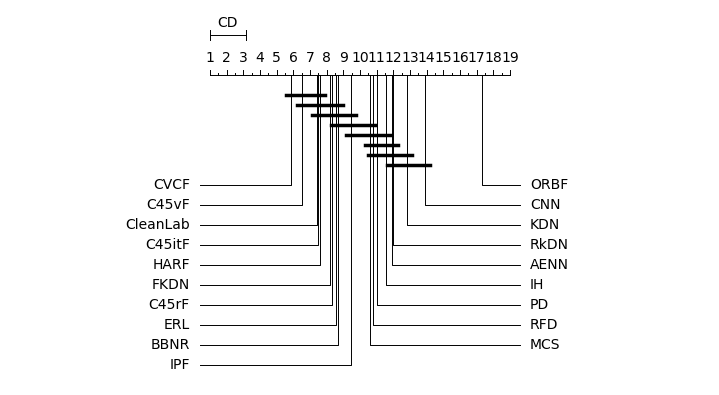

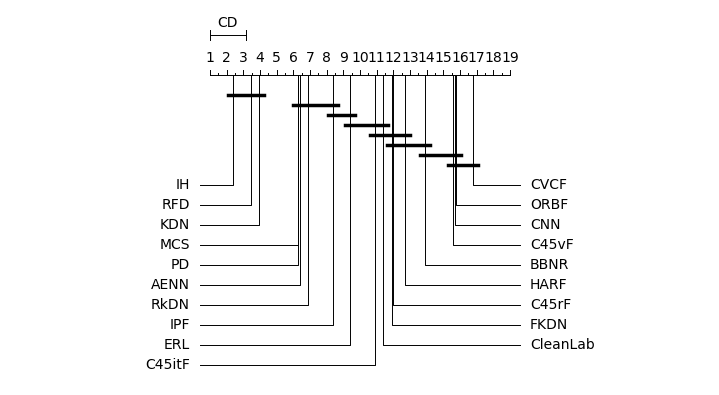

In [226]:
scores = ['Precision','Recall']
#fig, axs = plt.subplots(3,2,figsize=(16,4*len(score)))

for i, score in enumerate(scores):
   # for j,group in enumerate(groups):
        group = 'All'
        df = dfs#[dfs['Group']  == group]
        
        d = df.pivot_table(values=score, index=['NoiseType','NoiseLevel','Dataset'], columns='Model', aggfunc='mean')
       # d = d.dropna(axis = 1)

        d = d.rank(ascending = False, axis = 1).astype(int)

        names = d.columns.to_list()
        #= ['RF', 'NN', 'SVM','LR','XGBoost', 'KNN']
        #d.columns.to_list()
        avranks = d.mean()
        # First Friedman test (global)  H0: no difference, if rejected 
        # Nemenyi or Bonferroni-Dunn (one-sided, two sided): H0: no difference
        cd = Orange.evaluation.compute_CD(avranks, len(d), alpha='0.05', 
                                         # test="bonferroni-dunn"
                                         )
        print(cd)
        
        
        
        Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7
                                      , textspace=2,  fontsize = 2
                                      # cdmethod=0
                                     )
      #  group = 'All'
        name = 'figures/CD'+group+'_'+score+'.png'

        plt.savefig('figures/CD'+group+'_'+score+'.png',transparent=True,bbox_inches = 'tight', dpi = 300)


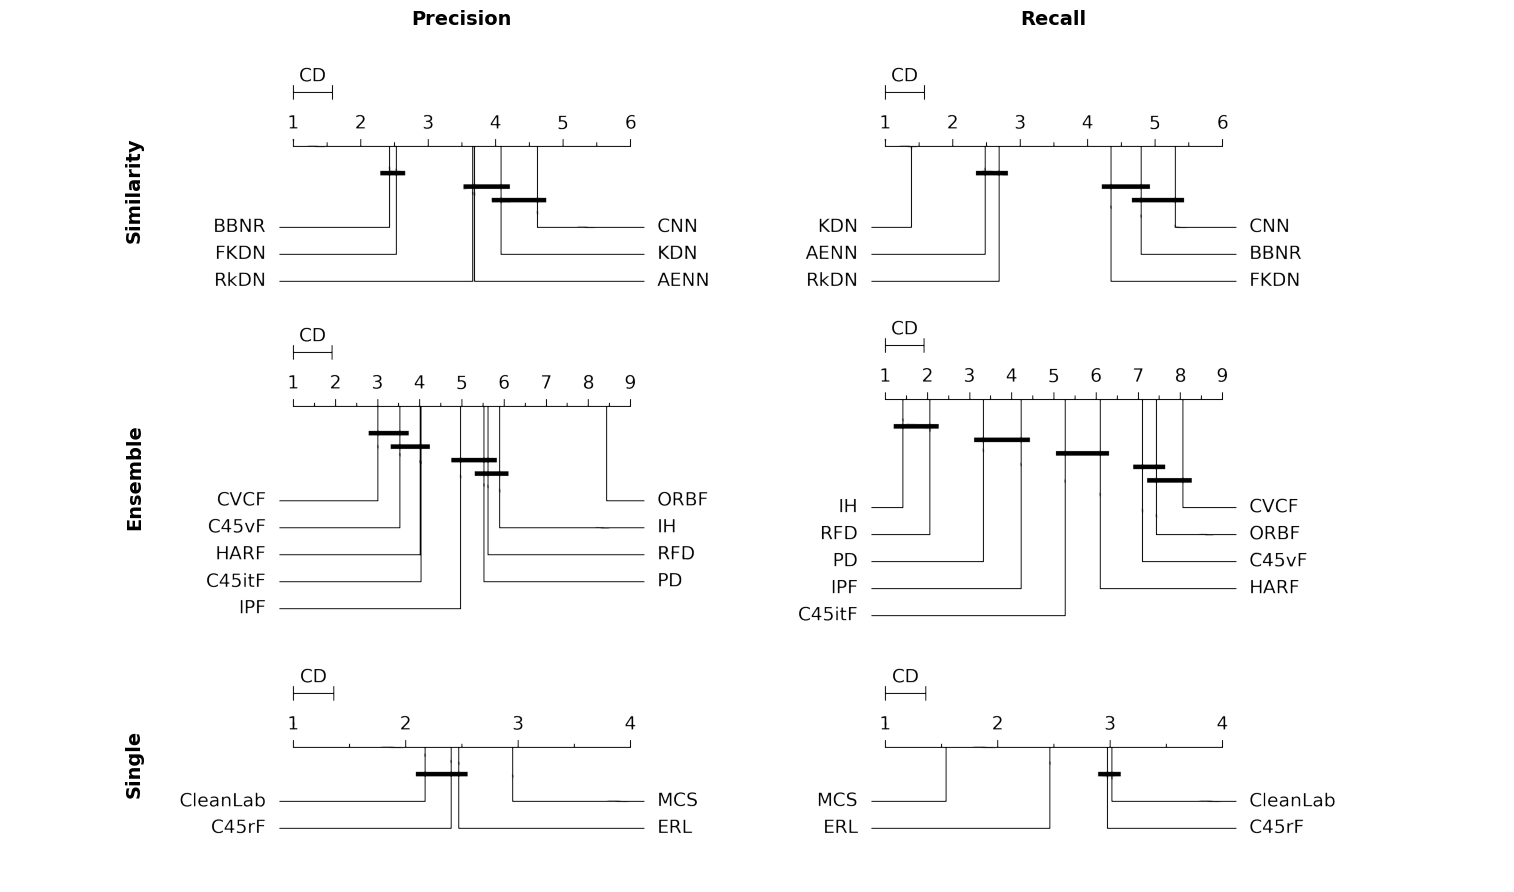

In [294]:
import pickle as pkl
fig, axs = plt.subplots(3,2,figsize=(8,2*len(score)))

for i, score in enumerate(scores):
    for j,group in enumerate(groups):
        

        name = 'figures/CD'+group+'_'+score+'.png'
        ax = plt.imread(name)
        axs[j,i].imshow(ax)
        axs[j,i].xaxis.set_visible(False) # same for y axis.
      #  axs[j,i].yaxis.set_visible(False) # same for y axis.
        fig.tight_layout(pad=-25.0)

        axs[j,i].set_frame_on(False)
        if j==0: 
            axs[j,i].set_title("{}".format(score), fontsize = 14, pad=15,weight='bold',style = 'normal',)
        if i==0:
            axs[j,i].set_ylabel(group,style = 'normal',
                                fontsize = 14,labelpad=-100 ,weight='bold'
                               )
        axs[j,i].set_yticks([]) 
plt.savefig('figures/CD.png',transparent=False,bbox_inches = 'tight', dpi = 150)


In [254]:
group

'Single'

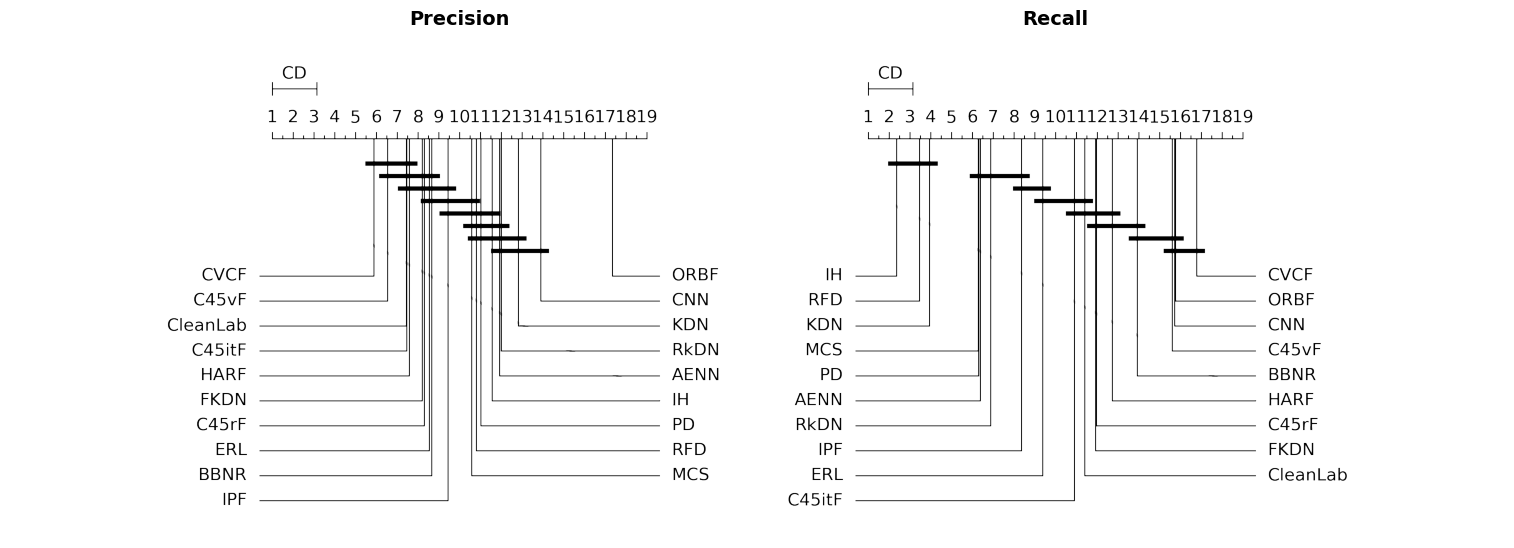

In [295]:
import pickle as pkl
fig, axs = plt.subplots(1,2,figsize=(8,2.5*len(score)))
group = 'All'
for i, score in enumerate(scores):        

        name = 'figures/CD'+group+'_'+score+'.png'
        ax = plt.imread(name)
        axs[i].imshow(ax)
#        axs[i].xaxis.set_visible(False) # same for y axis.
      #  axs[j,i].yaxis.set_visible(False) # same for y axis.
        fig.tight_layout(pad=-25.0)

        axs[i].set_frame_on(False)
       # if i==0: 
        axs[i].set_title("{}".format(score), fontsize = 14, pad=15,weight='bold',style = 'normal')
      
        axs[i].set_xticks([]) 
        axs[i].set_yticks([]) 

plt.savefig('figures/CD_All.png',transparent=False,bbox_inches = 'tight', dpi = 150)


In [ ]:
names = avranks.index
# First Friedman test (global)  H0: no difference, if rejected 
# Nemenyi or Bonferroni-Dunn: H0: no difference


# CD=qα(k(k+1)/6N)**0.5
cd = Orange.evaluation.compute_CD(avranks, d.shape[1], alpha='0.05', 
                                  test="bonferroni-dunn"
                                 )
print(cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=2, 
                              cdmethod=8
                             )
plt.show();


In [ ]:
avranks.to_list()

### Create and save a table with model attributes 

In [ ]:
## create the table
dfs.shape
mod = pd.read_csv('figures/models.txt',sep = '\t')
groups = ['Similarity','Ensemble','Single']
drop = ['saturationFilter', 'classifSF', 'DROP1', 'DROP2',
                                 'DROP3', 'EWF', 'TomekLinks','consensusSF','INFFC','ModeFilter', 'ENG']
mod = mod[~mod['Abbreviation'].isin(drop)]
#for group in groups:   
    #print(mod[mod['Group']==group]['Abbreviation'])
print(mod[mod['Package'].isin(['NoiseFiltersR'])]['Abbreviation'].to_list())

df = pd.DataFrame(dfs['Model'].value_counts().reset_index())
df[['Name','Group','Author']]=''

df['Model']='NoiseFiltersR'
df.loc[df['index'].isin(["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD"]),'Model']='Scikit-Clean'

df.loc[df['index']=='CleanLab','Model']='CleanLab'
df[['Name','Group','Author']]=''
df.columns= ['Abbreviation','Implementation','Full name','Group','Author']
df.to_csv("figures/models.csv",sep = '\t',index = False)


### Main Analysis (plots)

#### Analysis of DNN

In [106]:
labels = {'NoiseLevel': 'Noise level',
         'DatasetSize' : 'Sample size'}

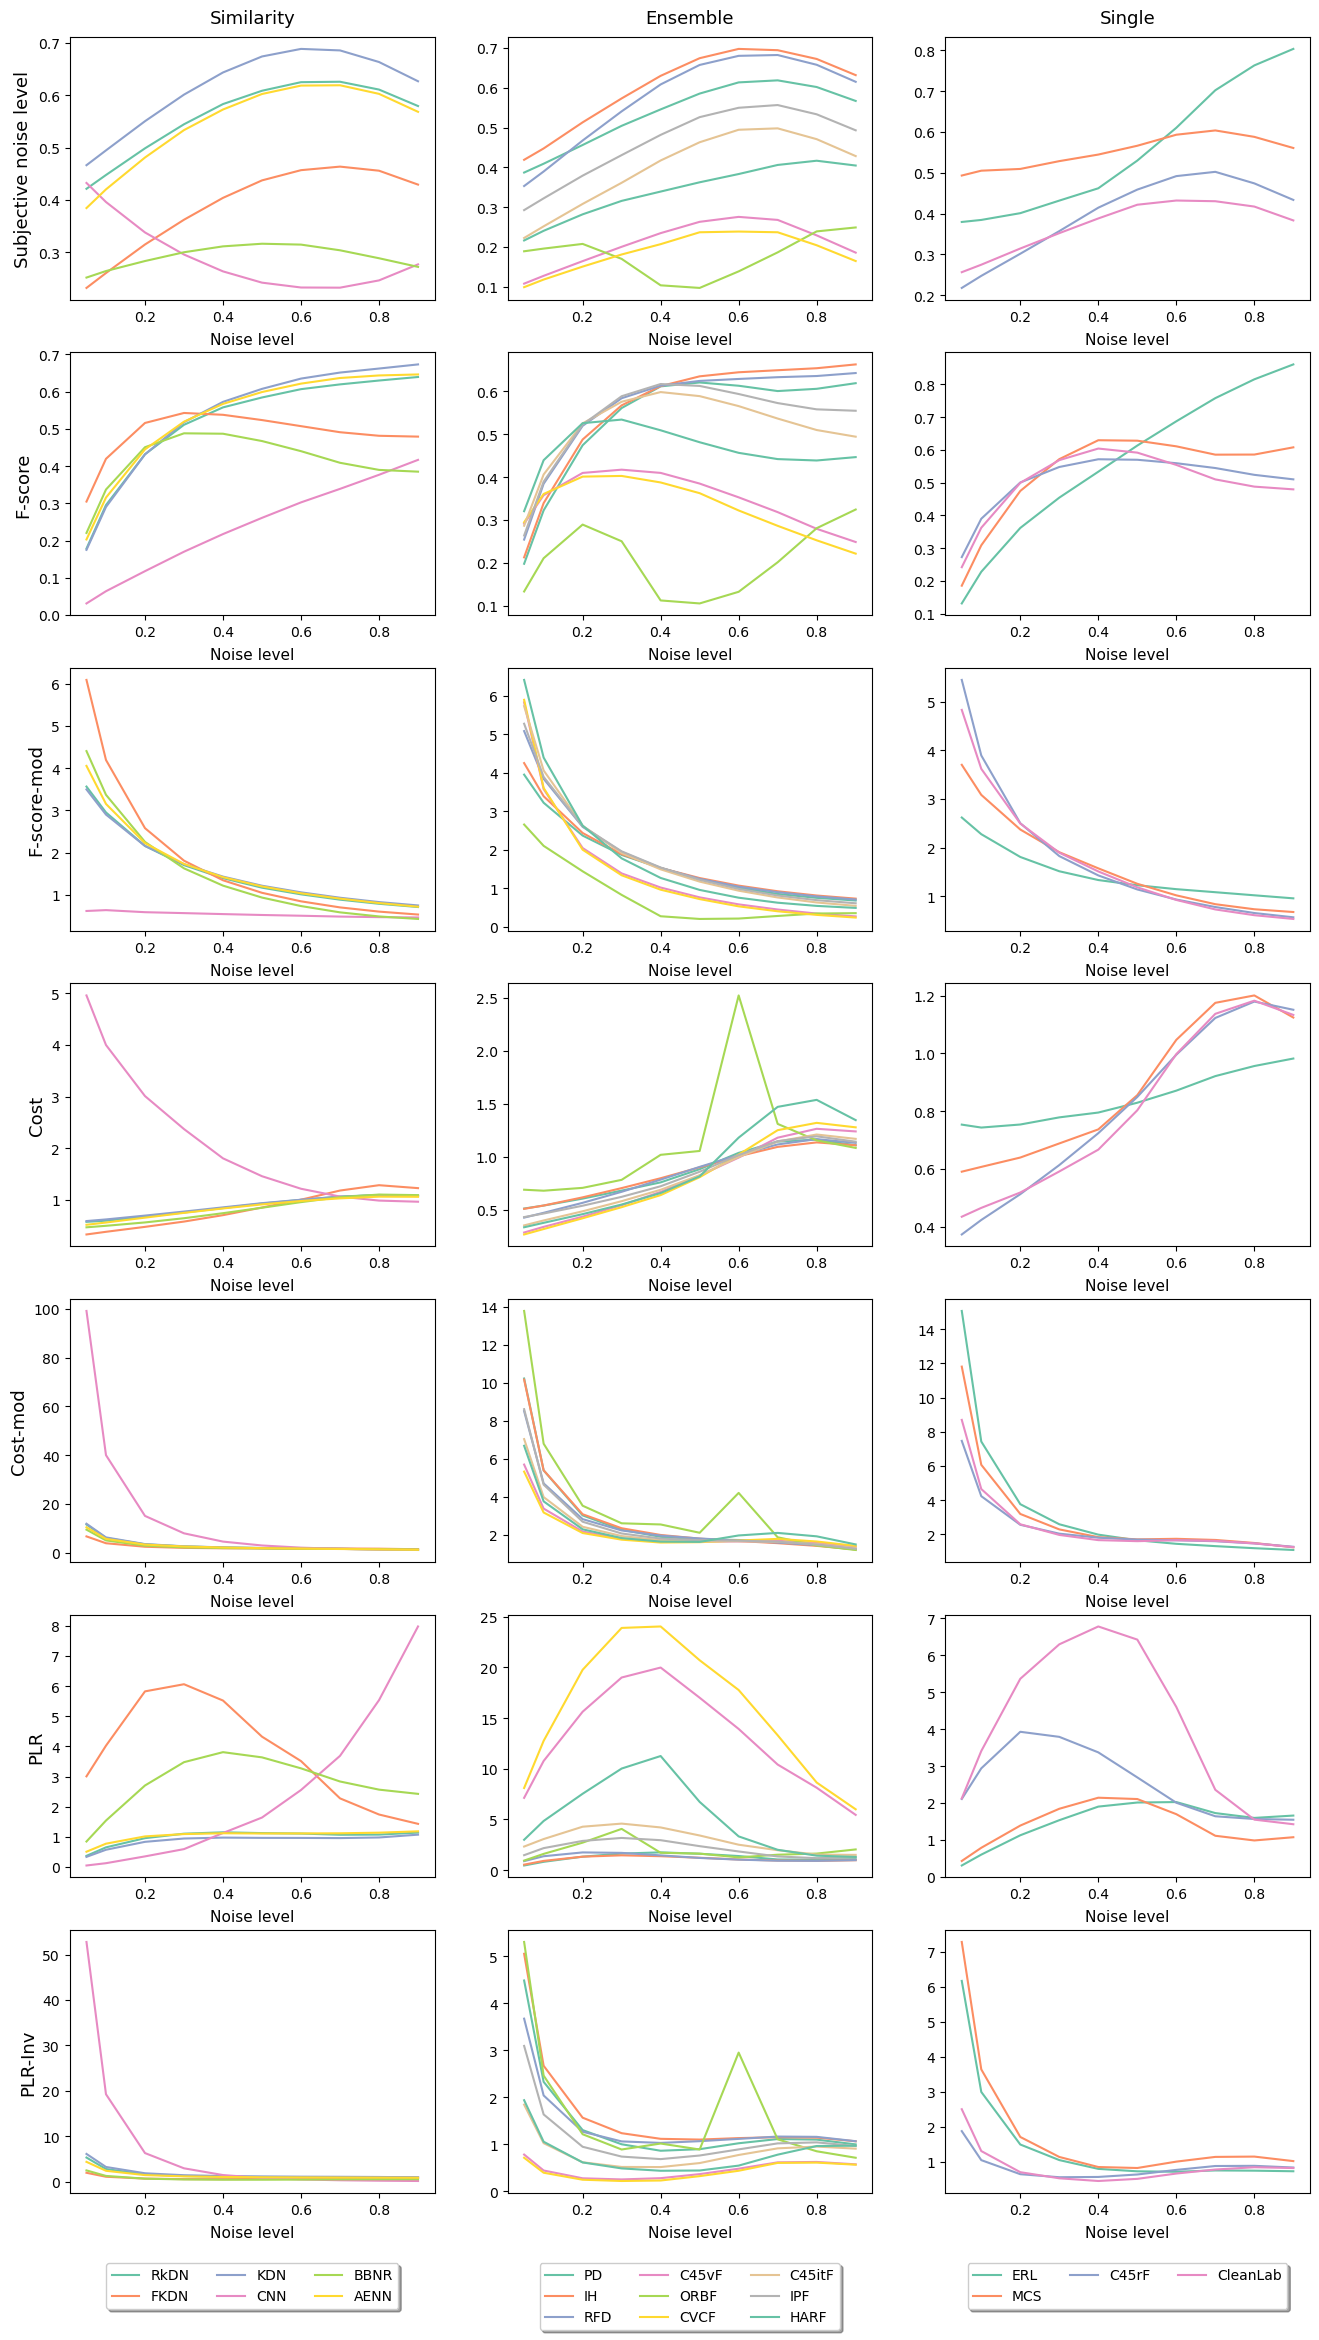

In [126]:
## Performance wrt to particular model 


allScores = dfs
di = {
  #  'PrecisionOverNoise':[['Precision', pon, pon], ['NoiseLevel','NoiseLevel','DatasetSize'], True], #Figure 7
  #   'RecallOverNoise':[['Recall', 'Recall'], ['NoiseLevel','DatasetSize'], True], # Figure 8
   #  'CostOfTP' : [[retrieved,'PLR-Inv' ], ['NoiseLevel','NoiseLevel'], False], # Figure 10
    #  'ExecutionTime' : [['Execution Time','Execution Time'],['NoiseLevel','DatasetSize'], False],
    'CostComparison' : [[retrieved, 'F-score','F-score-mod', 'Cost','Cost-mod','PLR','PLR-Inv'], ['NoiseLevel']*7, False]
     
     }



fontsize = 10

for key in di.keys():

    li = di[key][0]
    variables = di[key][1]
    fig, axs = plt.subplots(len(li),3,figsize=(16,4*len(li)))

    for j,Score in enumerate(li):

        scores = allScores
        variable = variables[j]
        label = labels[variable]
        lim = scores.groupby(['Model', variable]).mean()[Score]
        applyLim = di[key][2]
        for i,group in enumerate(groups):  
                models = mod[mod['Group']==group]['Abbreviation']

                for model in models[:]:
                    table_ = scores[scores['Model'] == model]
                   # print(model,len(table_))


                    if len(table_) > 0:

                        table = pd.DataFrame(table_.groupby(variable).mean()).reset_index()
                        table_ = table.sort_values([variable])

                        axs[j,i].plot(table[variable],table[Score].astype(float),  label = model)
                        if j==len(li)-1: 
                            axs[j,i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.24),
                  fancybox=True, shadow=True, ncol=3)
                        axs[j,i].set_xlabel(label,fontsize = 11, labelpad=6 )

                        if j==0: 
                            axs[j,i].set_title("{}".format(group), fontsize = 13, pad=10)
                        if i==0:
                            axs[j,i].set_ylabel(Score,fontsize = 13 )
                        if applyLim:
                            axs[j,i].set_ylim(lim.min()-0.05,lim.max()+0.05)
    name = key+'.png'
    plt.savefig(name,transparent=False,bbox_inches = 'tight', dpi = 90)
    #plt.savefig('figures/TrioPoster.png',transparent=False,bbox_inches = 'tight', dpi = 350)


#### Figure 2: Precision, recall and F-score in dependence of the noise level (left) and dataset size (right) over all models and all datasets


In [161]:
di = {'NoiseLevel':'Noise level','DatasetSize':'Dataset size'}
fs = 16

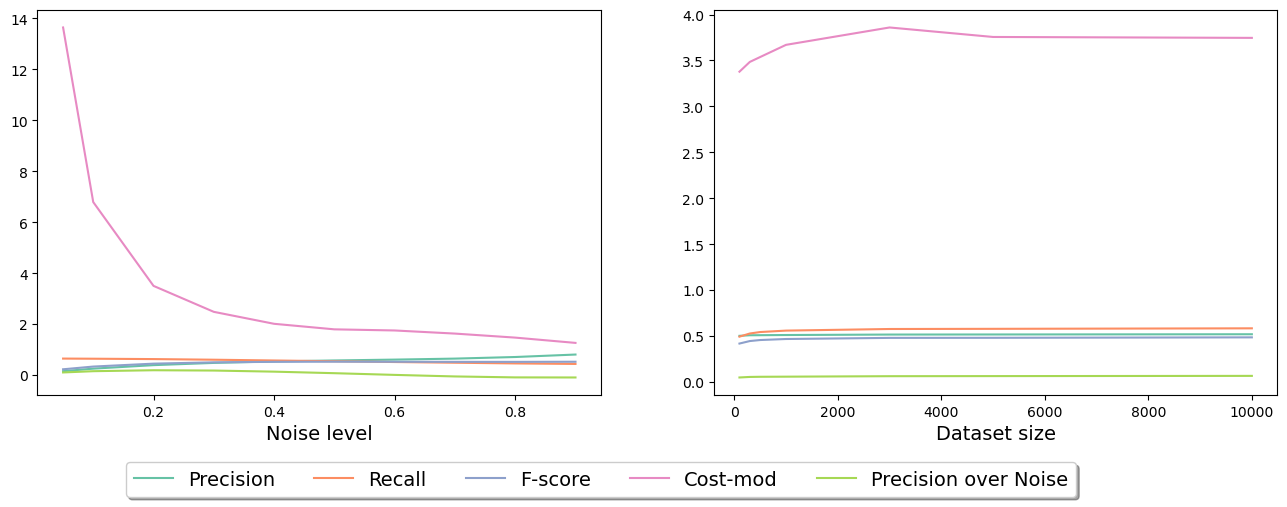

In [133]:
fig, axs = plt.subplots(1,2,figsize=(16,5))
li = ['NoiseLevel','DatasetSize']
fs = 14
for i in range(len(li)):
    c = li[i]
    df =  dfs.groupby([c]).mean()[[
        'Precision','Recall','F-score',
        cost1,
                                 pon
                                  ]]
    for col in df.columns:
       
        axs[i].plot(df.index,df[col], label = col)

        #axs[i].legend(fontsize = fs
       # loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4
        #)

        axs[i].set_xlabel(di[c],fontsize = fs)
        axs[i].set_ylabel('',fontsize = fs)
        if i==1: 
            axs[i].legend(loc='upper center', bbox_to_anchor=(-0.2, -0.15
                                                             ),
          fancybox=True, shadow=True, ncol=df.shape[1], fontsize = 14)


    #plt.savefig('figures/AllScoreMeansNoiseSize.png',transparent=False,bbox_inches = 'tight')

               

#### An example plot with different y scales

Precision
Recall
F-score
Cost
F-score-mod
Precision over Noise
Accuracy


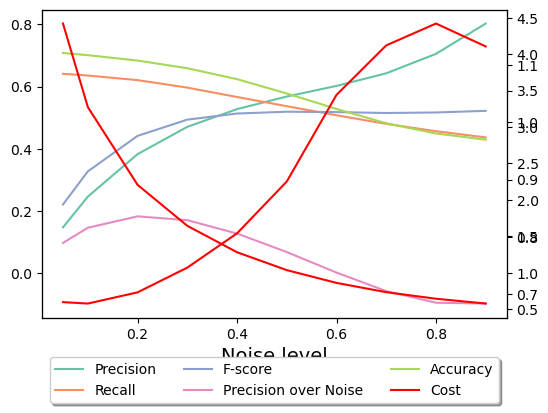

In [180]:
fig, axs = plt.subplots(figsize=(6,4))
li = ['NoiseLevel']
fs = 14
lines = [
        'Precision',
    'Recall',
    'F-score',
        cost,
    'F-score-mod',
    pon,
                                'Accuracy'
                                  ]
for i in range(len(li)):
    c = li[i]
    df =  dfs.groupby([c]).mean()[lines]
    for col in df.columns:
        print(col)
         
        name =  cost
        if col in [name, 'F-score-mod']:
            axs2 = axs.twinx()
            axs2.plot(df.index,df[col], label = col,color = 'red')
            axs2.set_xlabel(di[c],fontsize = fs)
            axs2.set_ylabel('',fontsize = fs)
           # axs2.legend(loc='lower center',# bbox_to_anchor=(-0.2, -0.15
                                       #                      ),
          #fancybox=True, shadow=True, 
            #ncol=df.shape[1], fontsize = 14
       # )
        else:

            axs.plot(df.index,df[col], label = col)

            axs.set_xlabel(di[c],fontsize = fs)
            axs.set_ylabel('',fontsize = fs)
         
   # labs = [l.get_label() for l in lns]
   # axs.legend( lines, loc=0)
    axs.plot(np.nan, '-r', label = name)
    axs.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3                                                ),
          fancybox=True, shadow=True, 
            ncol=3, fontsize = 10      )


    #plt.savefig('figures/AllScoreMeansNoiseSize.png',transparent=False,bbox_inches = 'tight')

               

In [127]:
dfs[['F-score-mod',cost]].corr()

F-score-mod  Effectiveness
F-score-mod         1.0000         0.0280
Effectiveness       0.0280         1.0000

#### Figure 3. Precision, recall and F-score for different datasets over all parameters.

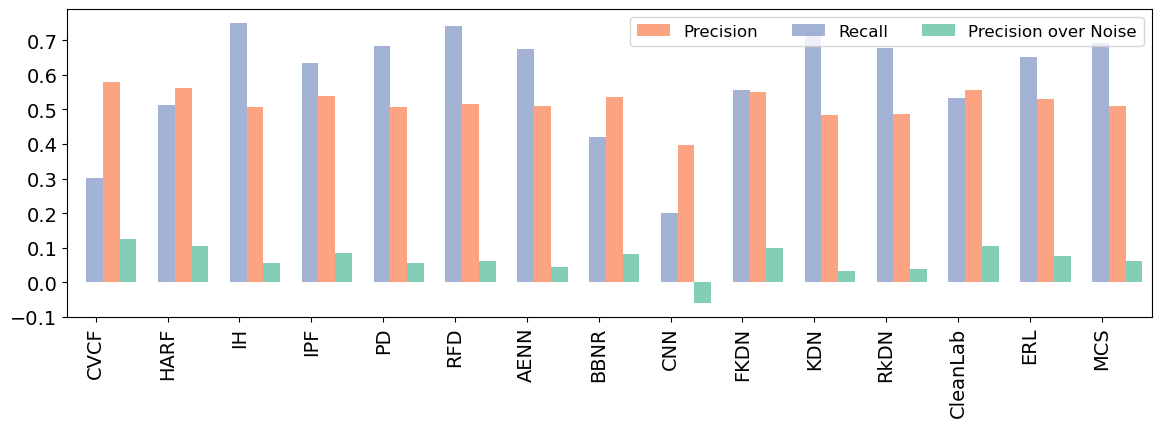

In [164]:

df =  dfs.groupby(['Model']).mean()[['Precision','Recall','F-score','Accuracy',pon]].dropna(how = 'all')


di = dict(dfs[['Model','Group']].value_counts().index)
di1 = {'Ensemble':0,'Similarity':1,'Single':2}



df['Group'] = df.index
df['Group'] = df['Group'].replace(di).replace(di1).astype(int)
df = df.sort_values('Group')
di2 = df['Group'].value_counts()
colors = []
for i in df['Group']:
    t = sns.color_palette("Set2", 8)[i]
    colors.append(t)
fig = plt.figure(figsize=(14,4
                         ))


colors = list(set(colors))
ax = fig.add_subplot(111)
indices = np.array(list(range(len(df))))
width = np.min(np.diff(indices))/3 -0.1

# matplotlib 3.0 you have to use align

ax.bar(indices+0.1,df['Precision'],width,align='edge',
       label = 'Precision',color = colors[1]
       ,alpha = 0.8 )

ax.bar(indices-width+0.1,df['Recall'],width,align='edge',
       label = 'Recall' ,alpha = 0.8, color = colors[2]
      )

ax.bar(indices+width+0.1,df[pon],width,align='edge',alpha = 0.8,
       label = pon,color = colors[0]
      )

#ax.bar(indices+width*2,df['Accuracy'],width,align='edge',
#       label = 'Accuracy')
#ax.bar(indices+width*3,df['PrecisionOverNoise'],width,align='edge',
#       label = 'PrecisionOverNoise')
#ax.legend(fontsize = fs)
#ax.axes.set_xticklabels( df.index.to_list())
plt.xticks(indices-0.0, df.index.to_list(), fontsize = fs-2,rotation=90)
plt.yticks(fontsize = fs-2)
#plt.ylabel(label,fontsize = fs+2)

#zero0 = mpatches.Patch(color=zero, label='Ensemble')
#one1 = mpatches.Patch(color=one, label='Similarity')
#two2 = mpatches.Patch(color=two, label='Single')


#plt.legend(handles=[one1,zero0, two2], fancybox=True, framealpha=1, ncol=3,fontsize = fs+2)
plt.legend(ncol = 3, fontsize = fs-4)
plt.xlim([-0.4,len(indices)-0.3])
    

    
#plt.savefig('figures/'+'all'+'Bar.png',transparent=False,bbox_inches = 'tight')

plt.show()

#### Plot analysis of only Autoencoder

Adult
DryBean
Chess
Magic
ClinVar
RNA0
RNA1
RNA2


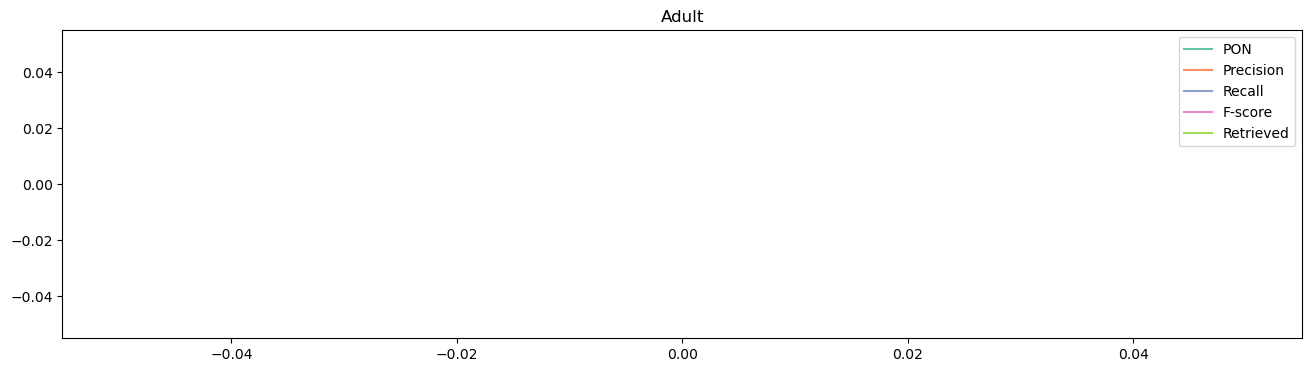

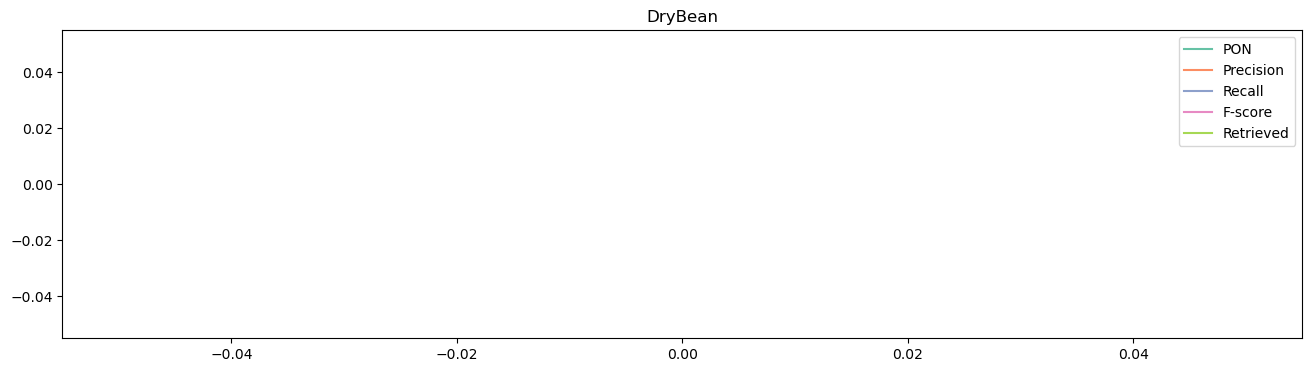

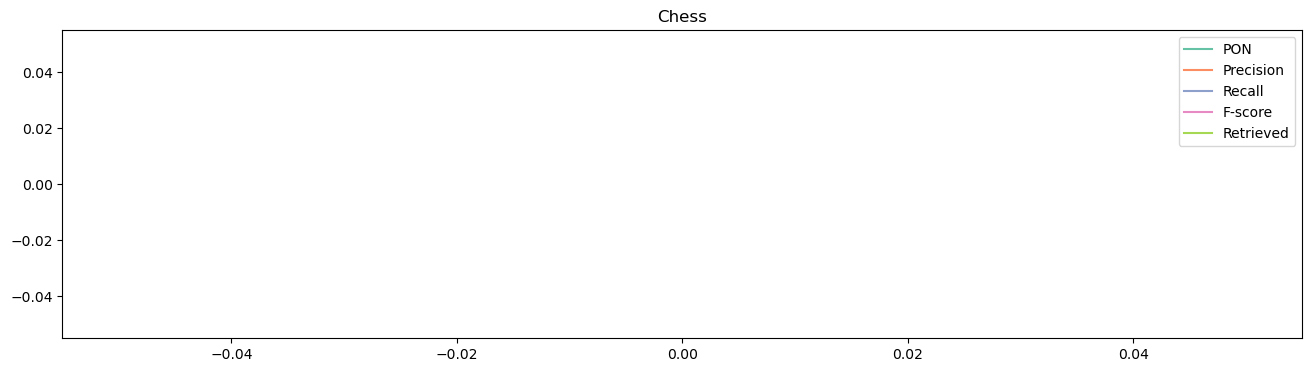

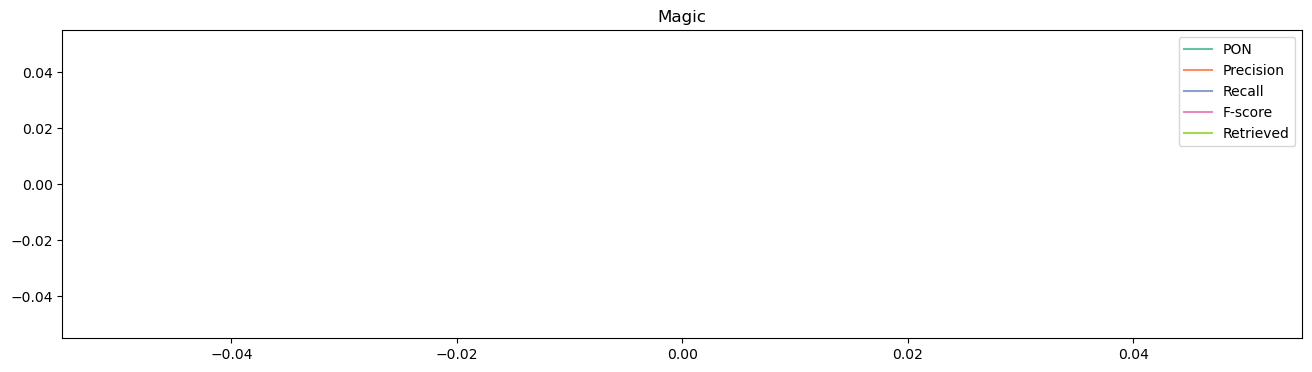

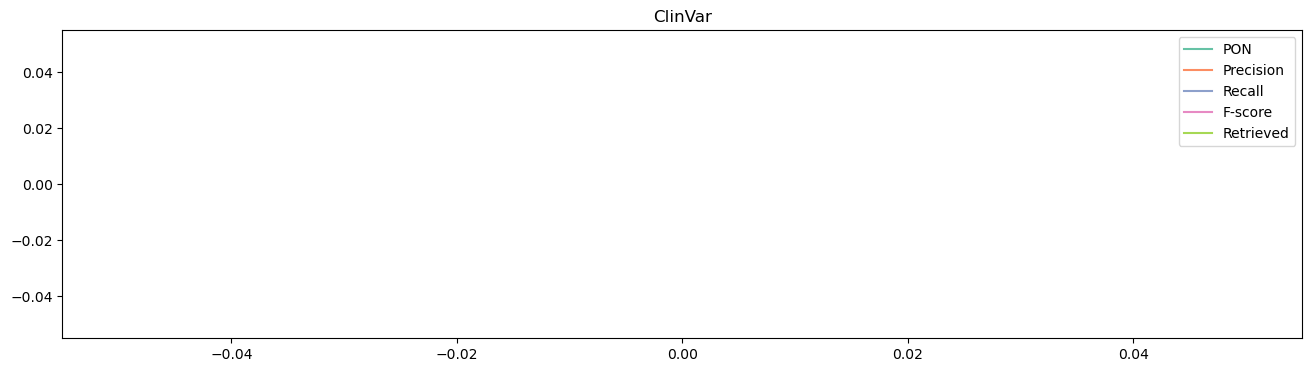

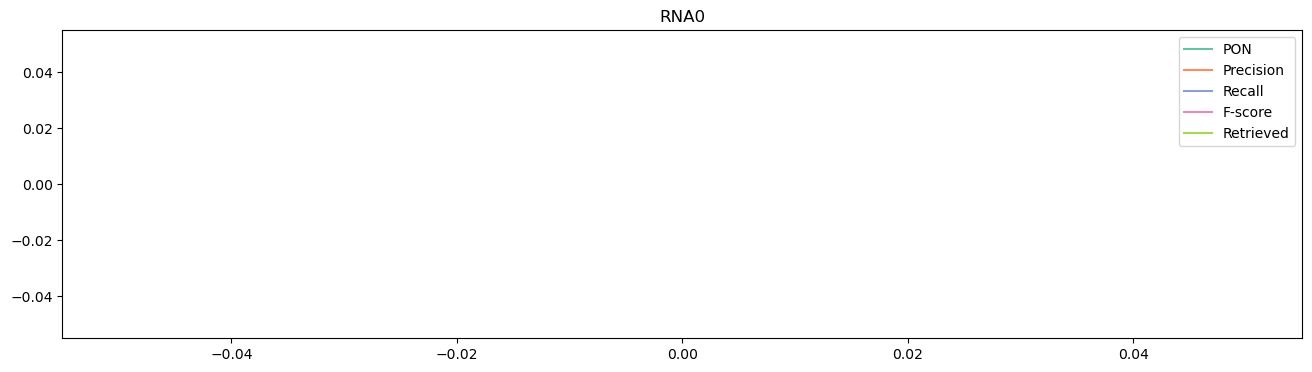

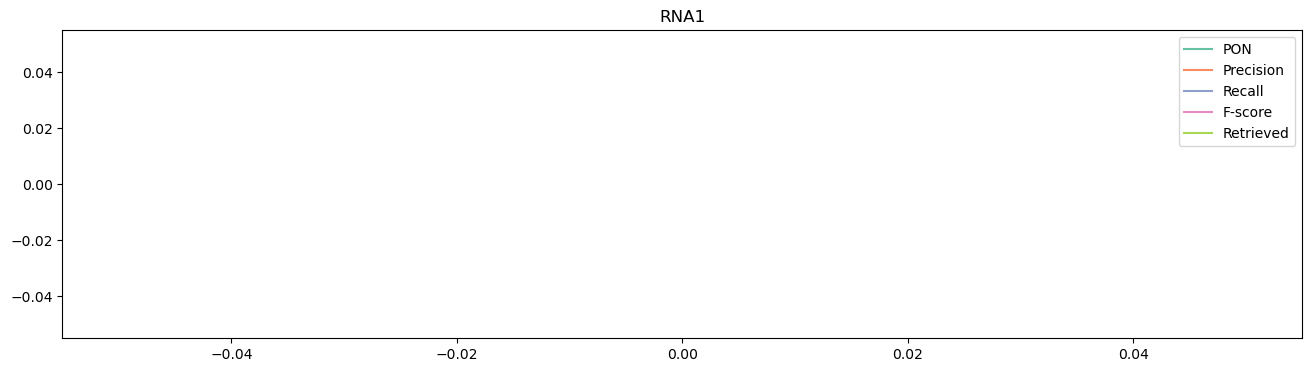

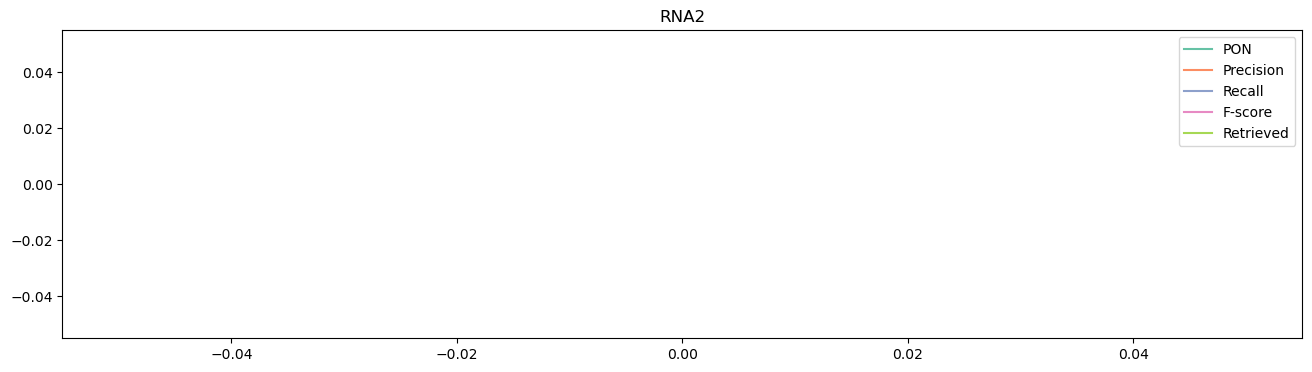

In [136]:
d = dfs[dfs['Model']=='AE']
score = 'Precision'
for dataset in datasets[:]:
    #dataset = 'DryBean'
    print(dataset)
    temp = d[d['Dataset']==dataset]
   # temp = temp[temp['DatasetSize']==10000]
    scores = pd.DataFrame()
    for i in temp.index:
       # print(i,temp['Index'][i])
        a = temp[temp['Model']=='AE']['Extra Info'][i]

        df = pd.DataFrame(eval(a.replace('cms:','')))
        df = df.replace(0,np.nan)
        noise = temp.loc[i,:]['NoiseLevel']
        df['PON'] = df['Precision'] - noise
       
        scores = scores.join(df, rsuffix = '_'+str(i), how = 'outer')
    fig = plt.figure(figsize=(16,4))

    for score in ['PON','Precision', 'Recall', 'F-score', 'Retrieved']:
        mean = scores[scores.columns[scores.columns.str.contains(score)]].mean(axis = 1)
        plt.plot(mean.index, mean.values, label = score)
        plt.title(dataset)
        plt.legend()

#### Save dataset desciptions into a file


In [139]:
# dont run
datasets = ["Adult","DryBean","Chess","Magic","Iris","ClinVarArt", "ClinVarReal", "RNA0", "RNA1", "RNA2"]
datasets = ["RNA0", "RNA1", "RNA2"]

for dataset in datasets:
    df = pd.read_csv('datasets/'+dataset+'.csv.gz',sep = '\t', compression = 'zip')
    print(dataset, df.shape)
    print(df.iloc[:,-1].value_counts(normalize = True, sort = False).round(2).to_dict())

RNA0 (15570, 51)
{0: 0.47, 1: 0.53}
RNA1 (19465, 51)
{0: 0.37, 1: 0.43, 2: 0.2}
RNA2 (22348, 51)
{0: 0.33, 1: 0.47, 2: 0.21}


#### Get the number of ClinVar Clean and Noisy Labels

In [137]:
df = pd.read_csv('dataProduced/ClinVarAnnoLabels.csv', sep = '\t',
                 index_col = 'Unnamed: 0',
                nrows=10000
                )
to_replace = {0: 'Uncertain significance', 
              1:'Benign',
             2:'Pathogenic'}

display(pd.crosstab(df['LabelOld'],df['LabelNew'], margins = True))
df = df[~((df['LabelNew'].str.contains('Conflicting',na = False))|(df['LabelOld'].str.contains('Conflicting', na = False)))]

pd.crosstab(df['LabelOld'],df['LabelNew'], margins = True)#.index



/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_74578/3287466056.py:1: DtypeWarning: Columns (158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataProduced/ClinVarAnnoLabels.csv', sep = '\t',


LabelNew                     Benign  Conflicting interpretations  Pathogenic  \
LabelOld                                                                       
Benign                         3525                          133           0   
Conflicting interpretations       0                           21           0   
Pathogenic                        8                           60         987   
Uncertain significance          158                          206          33   
All                            3691                          420        1020   

LabelNew                     Uncertain significance   All  
LabelOld                                                   
Benign                                           25  3683  
Conflicting interpretations                       1    22  
Pathogenic                                       36  1091  
Uncertain significance                         4805  5202  
All                                            4867  9998

LabelNew                Benign  Pathogenic  Uncertain significance   All
LabelOld                                                                
Benign                    3525           0                      25  3550
Pathogenic                   8         987                      36  1031
Uncertain significance     158          33                    4805  4996
All                       3691        1020                    4866  9577

In [ ]:
df = pd.read_csv('datasets/ClinVarReal.csv.gz', sep = '\t',
              #   index_col = 'Unnamed: 0',
               # nrows=10000
                 compression = 'zip'
                )

#### Model performance on different datasets (vertical plots)

In [128]:
dfs['Dataset'].unique()

array(['Adult', 'Chess', 'ClinVarArt', 'ClinVarReal', 'DryBean', 'Magic',
       'RNA0', 'RNA1', 'RNA2'], dtype=object)

35319
35326
35291
35361
13768
30256
35384
35336
35324


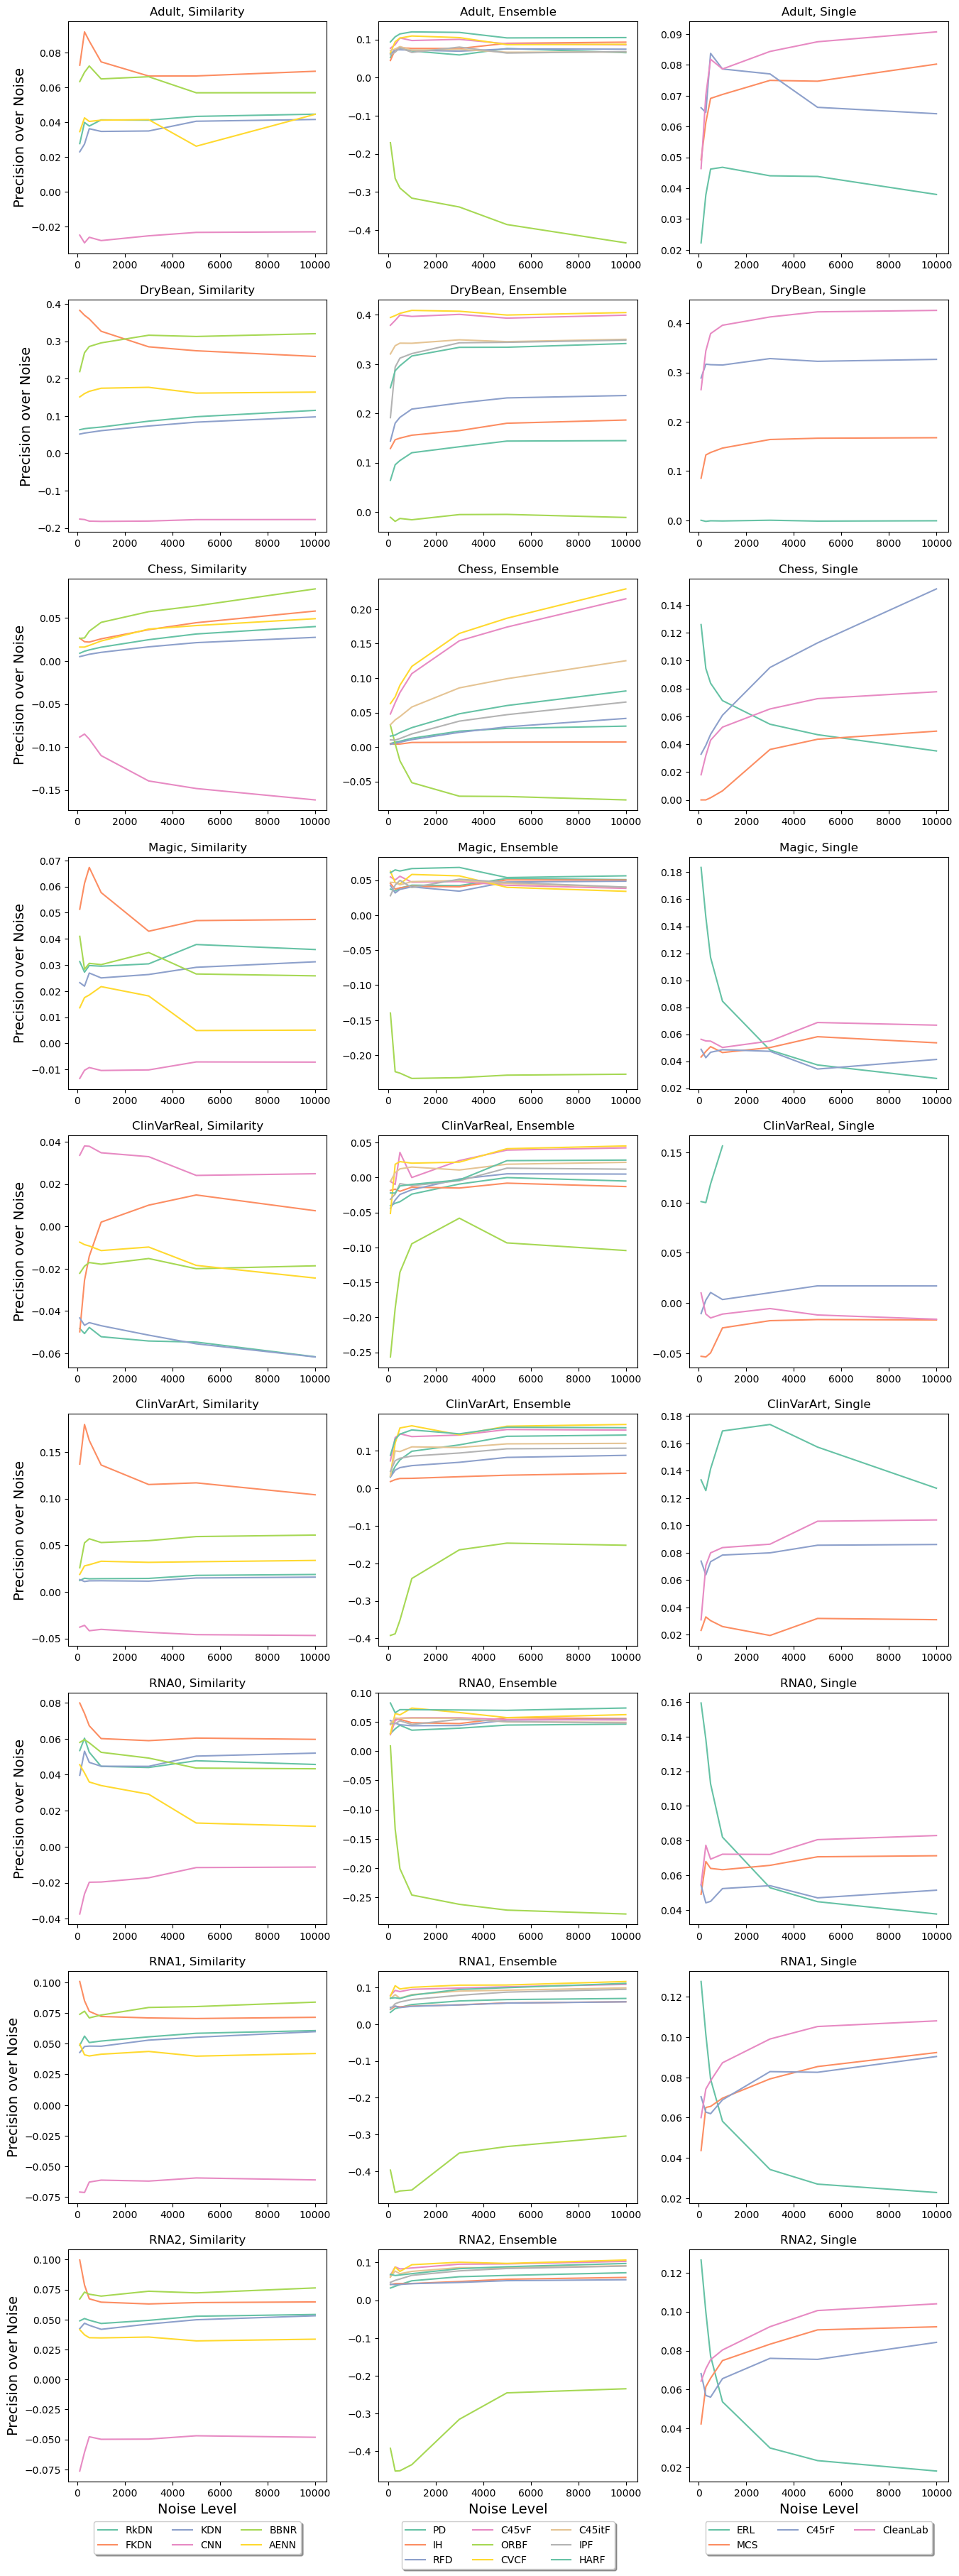

In [140]:
## Performance wrt to particular model 


##NoiseType=''
variable = 'DatasetSize'
#constant = ''
Score = pon
NoiseLevel = ''
allScores = dfs
#datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "EncodeArt"]
datasets = ["Adult","DryBean","Chess","Magic","ClinVarReal","ClinVarArt","RNA0","RNA1", "RNA2" ]

n = len(datasets)
fig, axs = plt.subplots(n,3,figsize=(16,5*n))

for j,Dataset in enumerate(datasets[:n]):

    scores = allScores[((allScores['Dataset'].str.contains(Dataset)) 
              # &(allScores['NoiseType'].str.contains(NoiseType)) 
              # &(allScores['Score'].str.contains(Score))
              #  &(allScores['DatasetSize']==DatasetSize))
              #  &(allScores['DatasetSize'].astype(str).str.len()==len(str(DatasetSize)))
            #  &(allScores['NoiseLevel'].astype(str).str.contains(str(NoiseLevel))
                       )
                   ]
    print(len(scores))
    #fig, axs = plt.subplots(1,3,figsize=(16,4))

    for i,group in enumerate(groups):  
            #print(i)
            models = mod[mod['Group']==group]['Abbreviation']
                #plt.figure(figsize=(8,5))
            for model in models[:]:

                table_ = scores[scores['Model'] == model]
                
                if len(table_) > 0:
                    table_ = table_.sort_values([variable])
                    table = pd.DataFrame(table_.groupby(variable).mean()).reset_index()
                    axs[j,i].plot(table[variable],table[Score].astype(float),  label = model)
                  
                    if j==n-1: 
                         axs[j,i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=3)

                    axs[j,i].set_title("{}, {}".format(Dataset, group), fontsize = 12 )
                    if j==n-1: 
                        axs[j,i].set_xlabel('Noise Level',fontsize = 14 )
                    if i==0:
                        axs[j,i].set_ylabel(Score,fontsize = 14 )
                    #plt.savefig('figures/'+Dataset+Score+noiseType+'.png',transparent=True)
#plt.savefig('figures/'+Score+'_'+variable+'.png',transparent=False,bbox_inches = 'tight')


####  Model performance on different datasets (horizontal plots)

35319
35326
35291
35361
13768
30256
35384
35336
35324


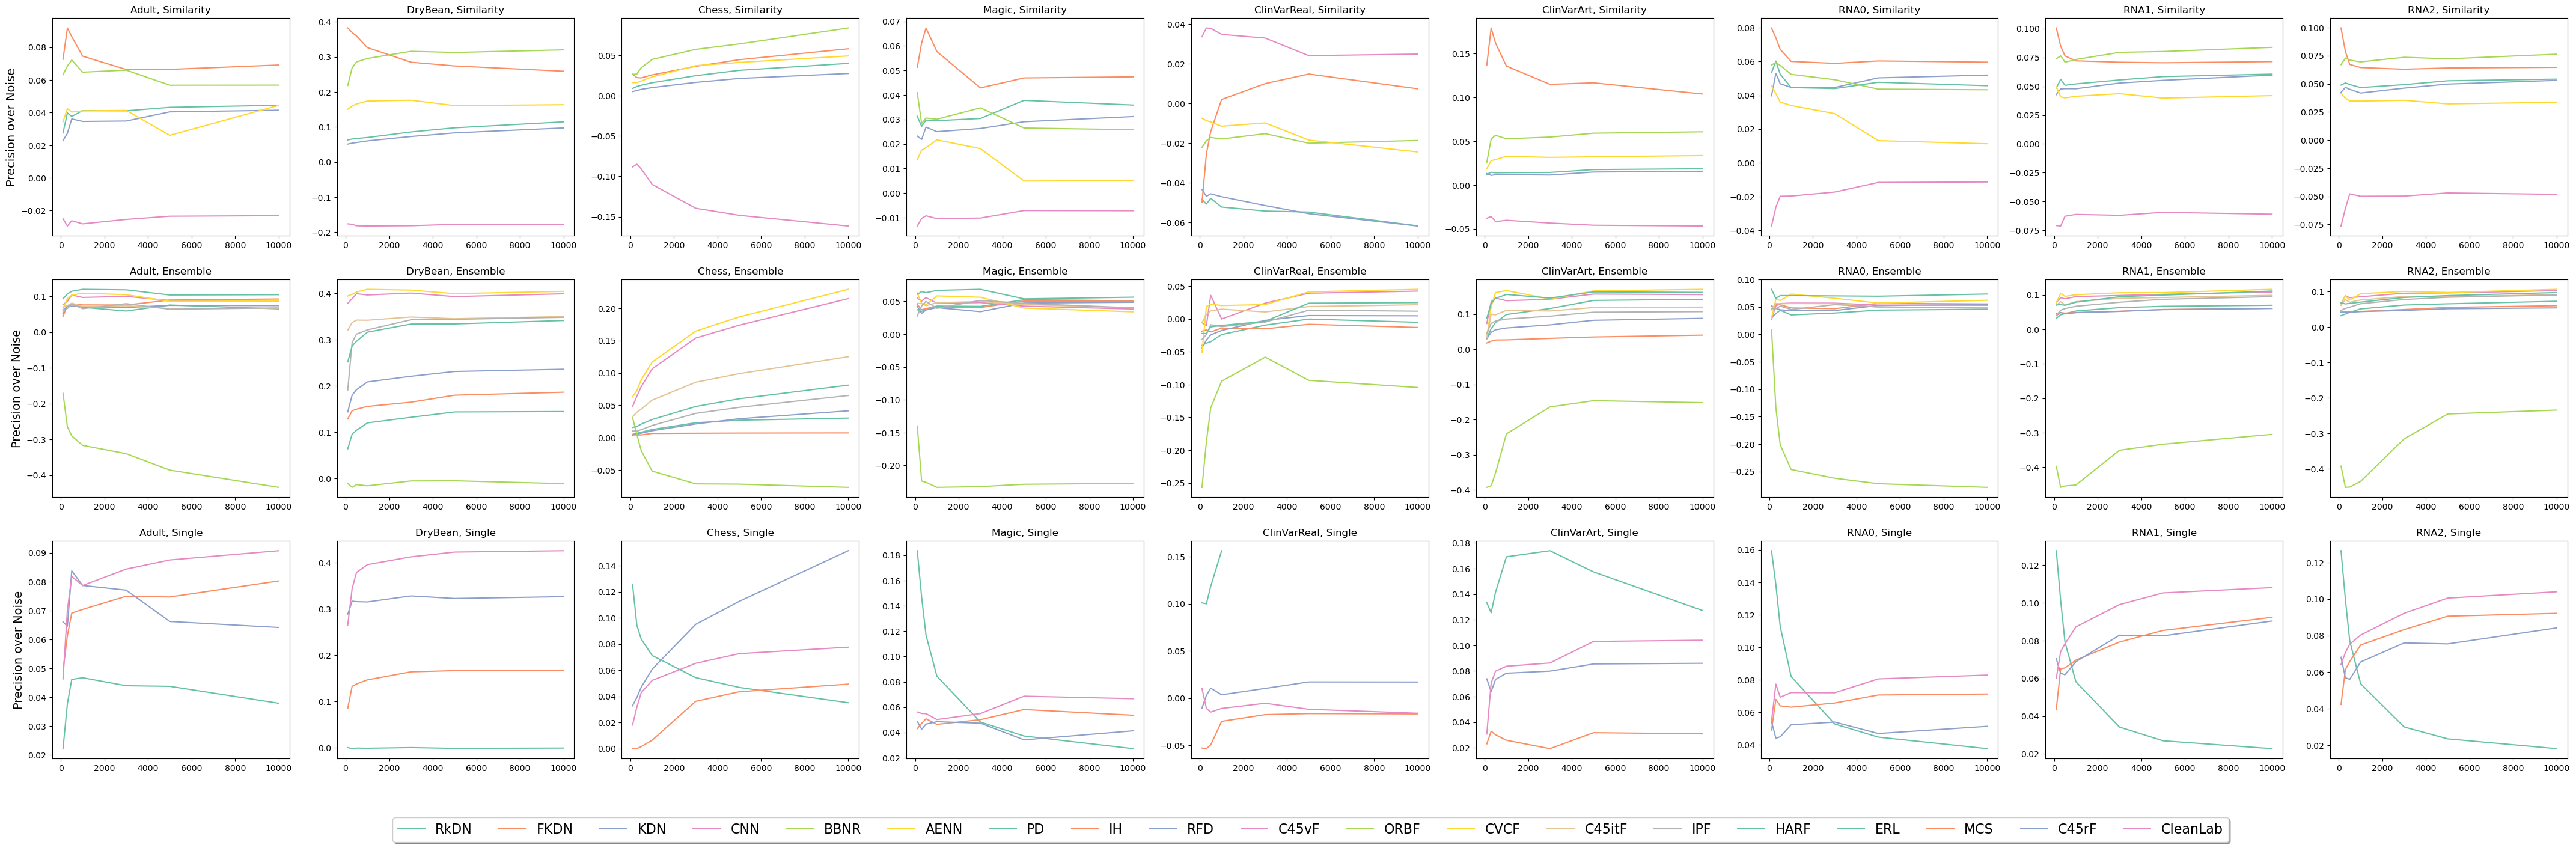

In [143]:
## Performance wrt to particular model 


##NoiseType=''
variable = 'DatasetSize'
#constant = ''
Score = pon

NoiseLevel = ''
allScores = dfs
#datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "EncodeArt"]
datasets = ["Adult","DryBean","Chess","Magic","ClinVarReal","ClinVarArt","RNA0","RNA1", "RNA2" ]

n = len(datasets)
#fig, axs = plt.subplots(3,n,figsize=(16,5*n))
fig, axs = plt.subplots(3,n,figsize=(6*n,16))

lines = []
labels = []

for i,Dataset in enumerate(datasets[:n]):
        bb = []                      

        scores = allScores[((allScores['Dataset'].str.contains(Dataset)) 
              # &(allScores['NoiseType'].str.contains(NoiseType)) 
              # &(allScores['Score'].str.contains(Score))
              #  &(allScores['DatasetSize']==DatasetSize))
              #  &(allScores['DatasetSize'].astype(str).str.len()==len(str(DatasetSize)))
            #  &(allScores['NoiseLevel'].astype(str).str.contains(str(NoiseLevel))
                       )
                   ]
        print(len(scores))
    #fig, axs = plt.subplots(1,3,figsize=(16,4))

        for j,group in enumerate(groups):  
                #print(i)
                models = mod[mod['Group']==group]['Abbreviation']
                    #plt.figure(figsize=(8,5))
                for model in models[:]:

                    table_ = scores[scores['Model'] == model]

                    if len(table_) > 0:
                        table_ = table_.sort_values([variable])
                        table = pd.DataFrame(table_.groupby(variable).mean()).reset_index()
                        b, = axs[j,i].plot(table[variable],table[Score].astype(float),  label = model)
                        bb.append(b,)

                      #  if j==len(groups)-1: 
                       #      axs[j,i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.24),
                        #                  fancybox=True, shadow=True, ncol=len(datasets))

                        axs[j,i].set_title("{}, {}".format(Dataset, group), fontsize = 12 )
                        if j==n-1: 
                            axs[j,i].set_xlabel('Noise Level',fontsize = 14 )

                        if i==0:
                            axs[j,i].set_ylabel(Score,fontsize = 14 )
                            Line, Label = axs[j,i].get_legend_handles_labels()
                            lines.append(Line)
                            labels.append(Label)

plt.legend(handles = bb, bbox_to_anchor=(-0.4, -0.24),
                                        fancybox=True, shadow=True, ncol=19, fontsize = 16)

name ='figures/'+Score+'_'+variable+'.png' 
#plt.savefig(name.replace(' ',''),transparent=False,bbox_inches = 'tight', dpi = 100)


#### Various scores at ones

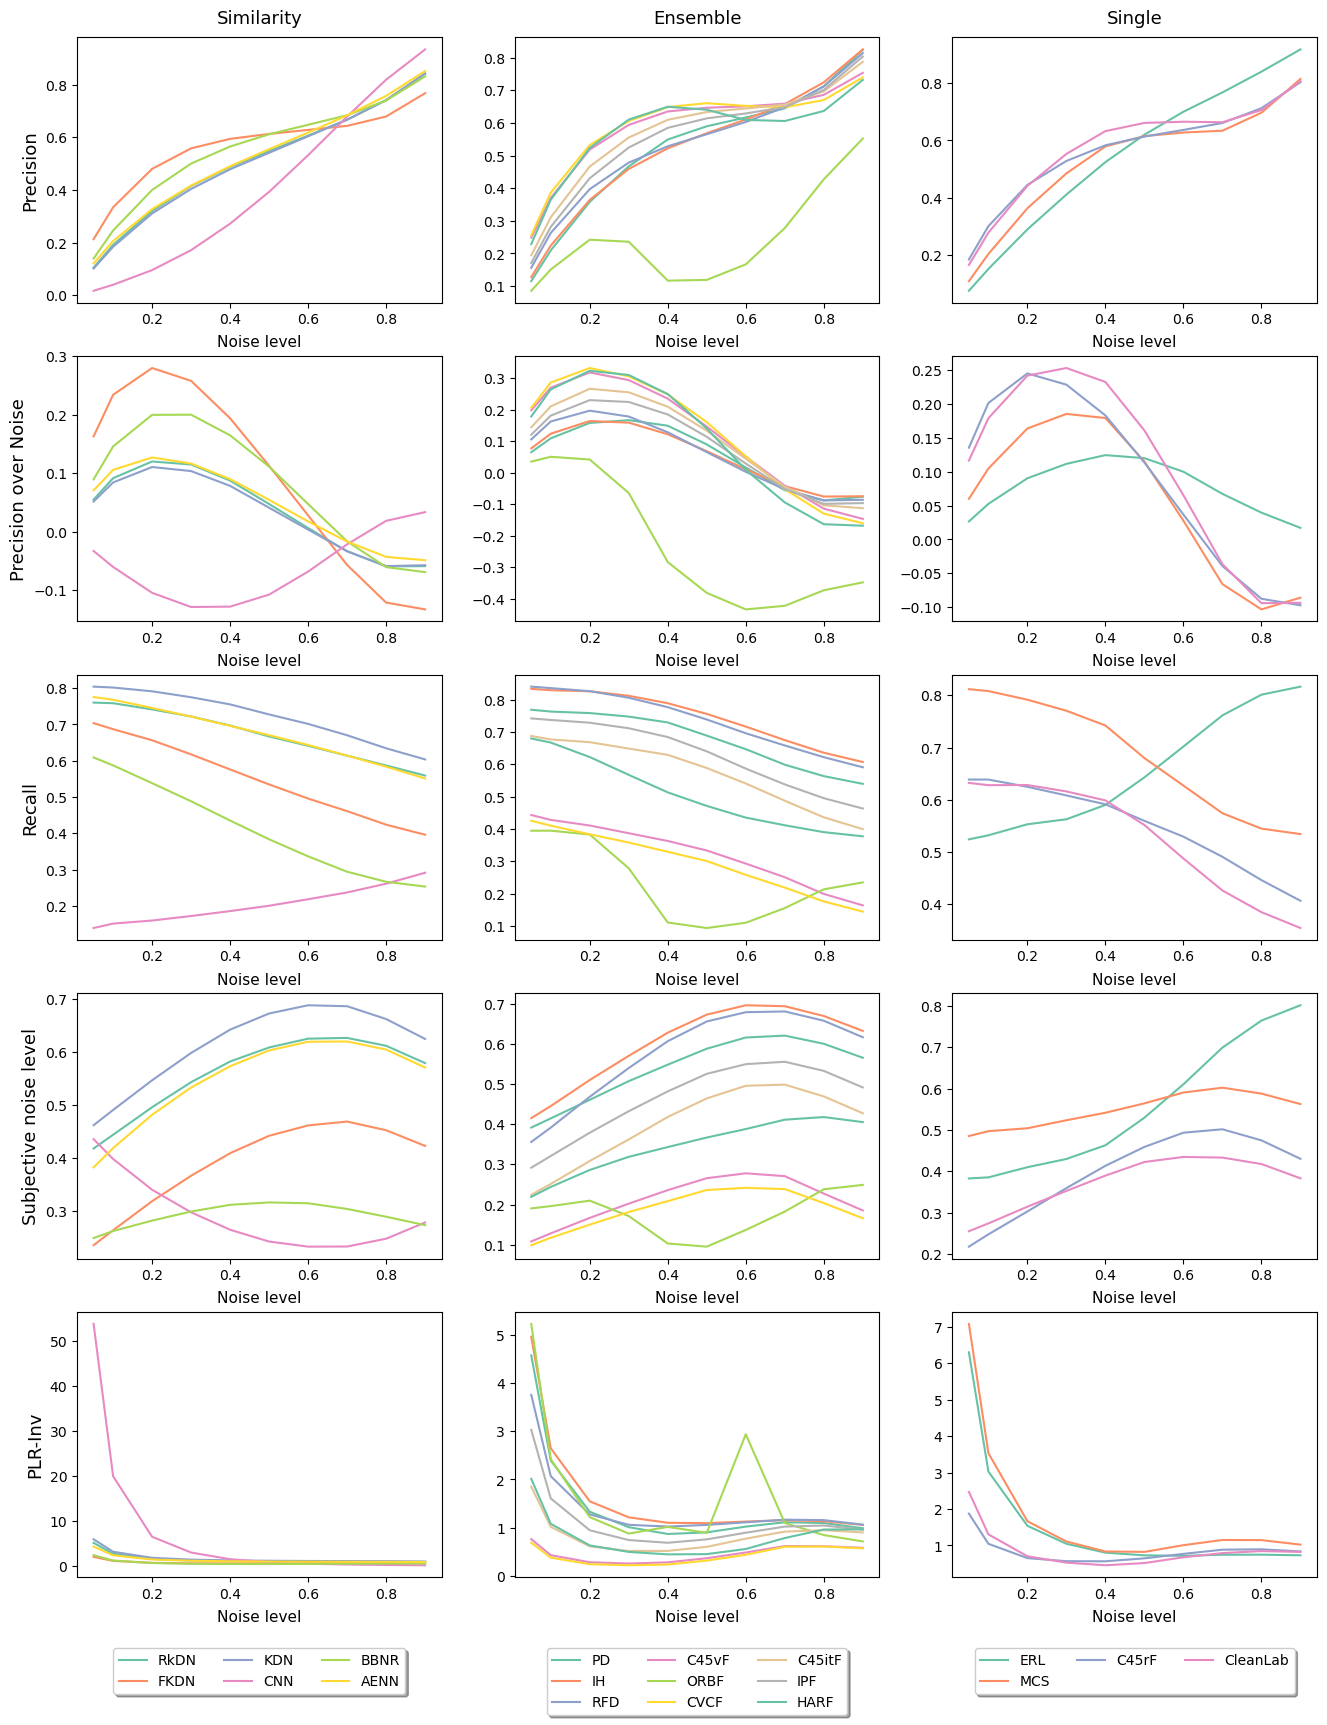

In [131]:
## Performance wrt to particular model 

variable = 'NoiseLevel'
label = 'Noise level'
#constant = ''
Score = pon
NoiseLevel = ''
allScores = dfs
#datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "EncodeArt"]
datasets = ["Adult","DryBean","Chess","Magic","ClinVar",'RNA0','RNA1','RNA2']

n = len(datasets)
n = 1#
li = [
    'Precision',
    pon,
    'Recall',
   # 'RecallOverNoise',
    #'F-score'
    retrieved,
    #'F-score',
    #  'F-score-mod',
   # cost,
      #cost1, 
     # 'PLR',
      'PLR-Inv'
    # 'Execution Time',
    # 'Execution Time'
     ]
fig, axs = plt.subplots(len(li),3,figsize=(16,4*len(li)))

fontsize = 10
describe = pd.DataFrame()

for j,Score in enumerate(li):

        scores = allScores
        #[
            #(~allScores['Dataset'].str.contains('ClinVarReal'))
      #  (~allScores['DatasetSize'].isin([3000,5000,10000,100000]))
       # ]
        for i,group in enumerate(groups):  
            models = mod[mod['Group']==group]['Abbreviation']
           # print(len(models))

            for model in models[:]:
                table_ = scores[scores['Model'] == model]
                describe[model] = table_[Score].describe()

             #   if j ==len(li)-1:
              #          variable = 'DatasetSize'
               #         label = 'Dataset Size'

                if len(table_) > 0:

                    table = pd.DataFrame(table_.groupby(variable).mean()).reset_index()
                    table_ = table.sort_values([variable])

                    axs[j,i].plot(table[variable],table[Score].astype(float),  label = model)
                    if j==len(li)-1: 
                        axs[j,i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.24),
              fancybox=True, shadow=True, ncol=3)
                    axs[j,i].set_xlabel(label,fontsize = 11, labelpad=6 )

                    if j==0: 
                        axs[j,i].set_title("{}".format(group), fontsize = 13, pad=10)
                    if i==0:
                        axs[j,i].set_ylabel(Score,fontsize = 13 )
                   # plt.savefig('figures/'+Score+'_OverNoise.png',transparent=True)
name = 'figures/'+Score+'Over'+variable+'Groups.png'
plt.savefig(name.replace(' ',''),transparent=False,bbox_inches = 'tight', dpi = 90)
#plt.savefig('figures/TrioPoster.png',transparent=False,bbox_inches = 'tight', dpi = 350)


In [223]:
dfs.groupby('Model').mean()

True Positive  False Positive  True Negative  False Negative  \
Model                                                                    
AENN            805.353         691.992        857.365         488.147   
BBNR            449.965         379.260       1170.098         843.535   
C45itF          773.406         484.933       1064.425         520.094   
C45rF           742.322         476.892       1072.466         551.178   
C45vF           428.278         269.903       1279.454         865.222   
CNN             311.297         570.091        979.267         982.203   
CVCF            390.791         242.498       1306.859         902.709   
CleanLab        598.671         408.458       1140.899         694.829   
ERL             886.427         641.305        908.052         407.073   
FKDN            764.307         545.604       1003.753         529.193   
HARF            566.687         333.581       1215.777         726.813   
IH              914.834         767.469        781.888         378.666   
IPF             766.972         523.225       1026.132         526.528   
KDN             875.341         804.915        744.442         418.159   
MCS             837.005         727.038        822.319         456.495   
ORBF            275.126         278.951       1270.406        1018.374   
PD              822.914         653.743        895.614         470.586   
RFD             881.056         669.013        880.344         412.444   
RkDN            810.101         728.097        821.261         483.399   

          Execution Time  Precision  Recall  F-score  NoiseLevel  DatasetSize  \
Model                                                                           
AENN             585.663      0.501   0.674    0.520       0.455     2842.857   
BBNR             200.942      0.534   0.418    0.407       0.455     2842.857   
C45itF            42.006      0.555   0.576    0.509       0.455     2842.857   
C45rF              7.364      0.546   0.553    0.499       0.455     2842.857   
C45vF              3.745      0.576   0.325    0.347       0.455     2842.857   
CNN              273.882      0.397   0.203    0.229       0.455     2842.857   
CVCF               3.815      0.581   0.300    0.329       0.455     2842.857   
CleanLab           2.824      0.555   0.529    0.490       0.455     2842.857   
ERL               31.307      0.528   0.648    0.545       0.455     2842.857   
FKDN               1.822      0.550   0.553    0.480       0.455     2842.857   
HARF              23.721      0.560   0.511    0.460       0.455     2842.857   
IH                 7.658      0.507   0.747    0.547       0.455     2842.857   
IPF                7.989      0.539   0.632    0.527       0.455     2842.857   
KDN                0.300      0.486   0.724    0.522       0.455     2842.857   
MCS                1.024      0.511   0.689    0.519       0.455     2842.857   
ORBF              23.962      0.238   0.236    0.204       0.455     2842.857   
PD                 0.032      0.509   0.679    0.523       0.455     2842.857   
RFD                1.283      0.515   0.738    0.552       0.455     2842.857   
RkDN               0.366      0.490   0.672    0.505       0.455     2842.857   

          Sample  Precision over Noise  RecallOverNoise  Accuracy  \
Model                                                               
AENN       1.651                 0.046            0.219     0.577   
BBNR       1.679                 0.079           -0.037     0.566   
C45itF     1.635                 0.100            0.121     0.623   
C45rF      1.669                 0.091            0.098     0.616   
C45vF      1.673                 0.121           -0.130     0.585   
CNN        1.672                -0.058           -0.252     0.460   
CVCF       1.655                 0.126           -0.155     0.582   
CleanLab   1.616                 0.100            0.074     0.604   
ERL        1.855                 0.073            0.193     0.6

#### Correlation score scores for cost of filtering

In [135]:
a = dfs[['Precision',pon,'Recall','F-score', 'F-score-mod','NoiseLevel','NoiseType','DatasetSize','Subjective noise level', 
         'Cost','Cost-mod','PLR','PLR-Inv'  ]]

corr = a.corr().round(3)
corr.round(3)

corr.columns = corr.columns.str.replace(pon,'PON').str.replace( 'Subjective noise level', 'SNR')
corr.index = corr.index.str.replace(pon,'PON').str.replace( 'Subjective noise level', 'SNR')

corr

Precision    PON  Recall  F-score  F-score-mod  NoiseLevel  \
Precision        1.000  0.274   0.100    0.704       -0.282       0.725   
PON              0.274  1.000   0.475    0.454        0.541      -0.463   
Recall           0.100  0.475   1.000    0.676        0.474      -0.248   
F-score          0.704  0.454   0.676    1.000        0.080       0.324   
F-score-mod     -0.282  0.541   0.474    0.080        1.000      -0.647   
NoiseLevel       0.725 -0.463  -0.248    0.324       -0.647       1.000   
DatasetSize      0.020  0.026   0.082    0.076        0.058      -0.000   
SNR              0.246 -0.009   0.717    0.630       -0.155       0.234   
Cost            -0.081 -0.451  -0.316   -0.213       -0.359       0.214   
Cost-mod        -0.282 -0.066  -0.078   -0.237        0.012      -0.205   
PLR              0.243  0.382  -0.196   -0.064        0.031      -0.028   
PLR-Inv         -0.208 -0.088  -0.033   -0.169       -0.033      -0.126   

             DatasetSize    SNR   Cost  Cost-mod    PLR  PLR-Inv  
Precision          0.020  0.246 -0.081    -0.282  0.243   -0.208  
PON                0.026 -0.009 -0.451    -0.066  0.382   -0.088  
Recall             0.082  0.717 -0.316    -0.078 -0.196   -0.033  
F-score            0.076  0.630 -0.213    -0.237 -0.064   -0.169  
F-score-mod        0.058 -0.155 -0.359     0.012  0.031   -0.033  
NoiseLevel        -0.000  0.234  0.214    -0.205 -0.028   -0.126  
DatasetSize        1.000  0.029  0.009     0.007 -0.004    0.008  
SNR                0.029  1.000  0.069     0.005 -0.303    0.089  
Cost               0.009  0.069  1.000     0.769 -0.107    0.763  
Cost-mod           0.007  0.005  0.769     1.000 -0.051    0.967  
PLR               -0.004 -0.303 -0.107    -0.051  1.000   -0.055  
PLR-Inv            0.008  0.089  0.763     0.967 -0.055    1.000

In [115]:
corr.to_excel('figures/corr_table.xlsx')

#### Comparison of symmetric, asymmetric noise and real on different datasets 

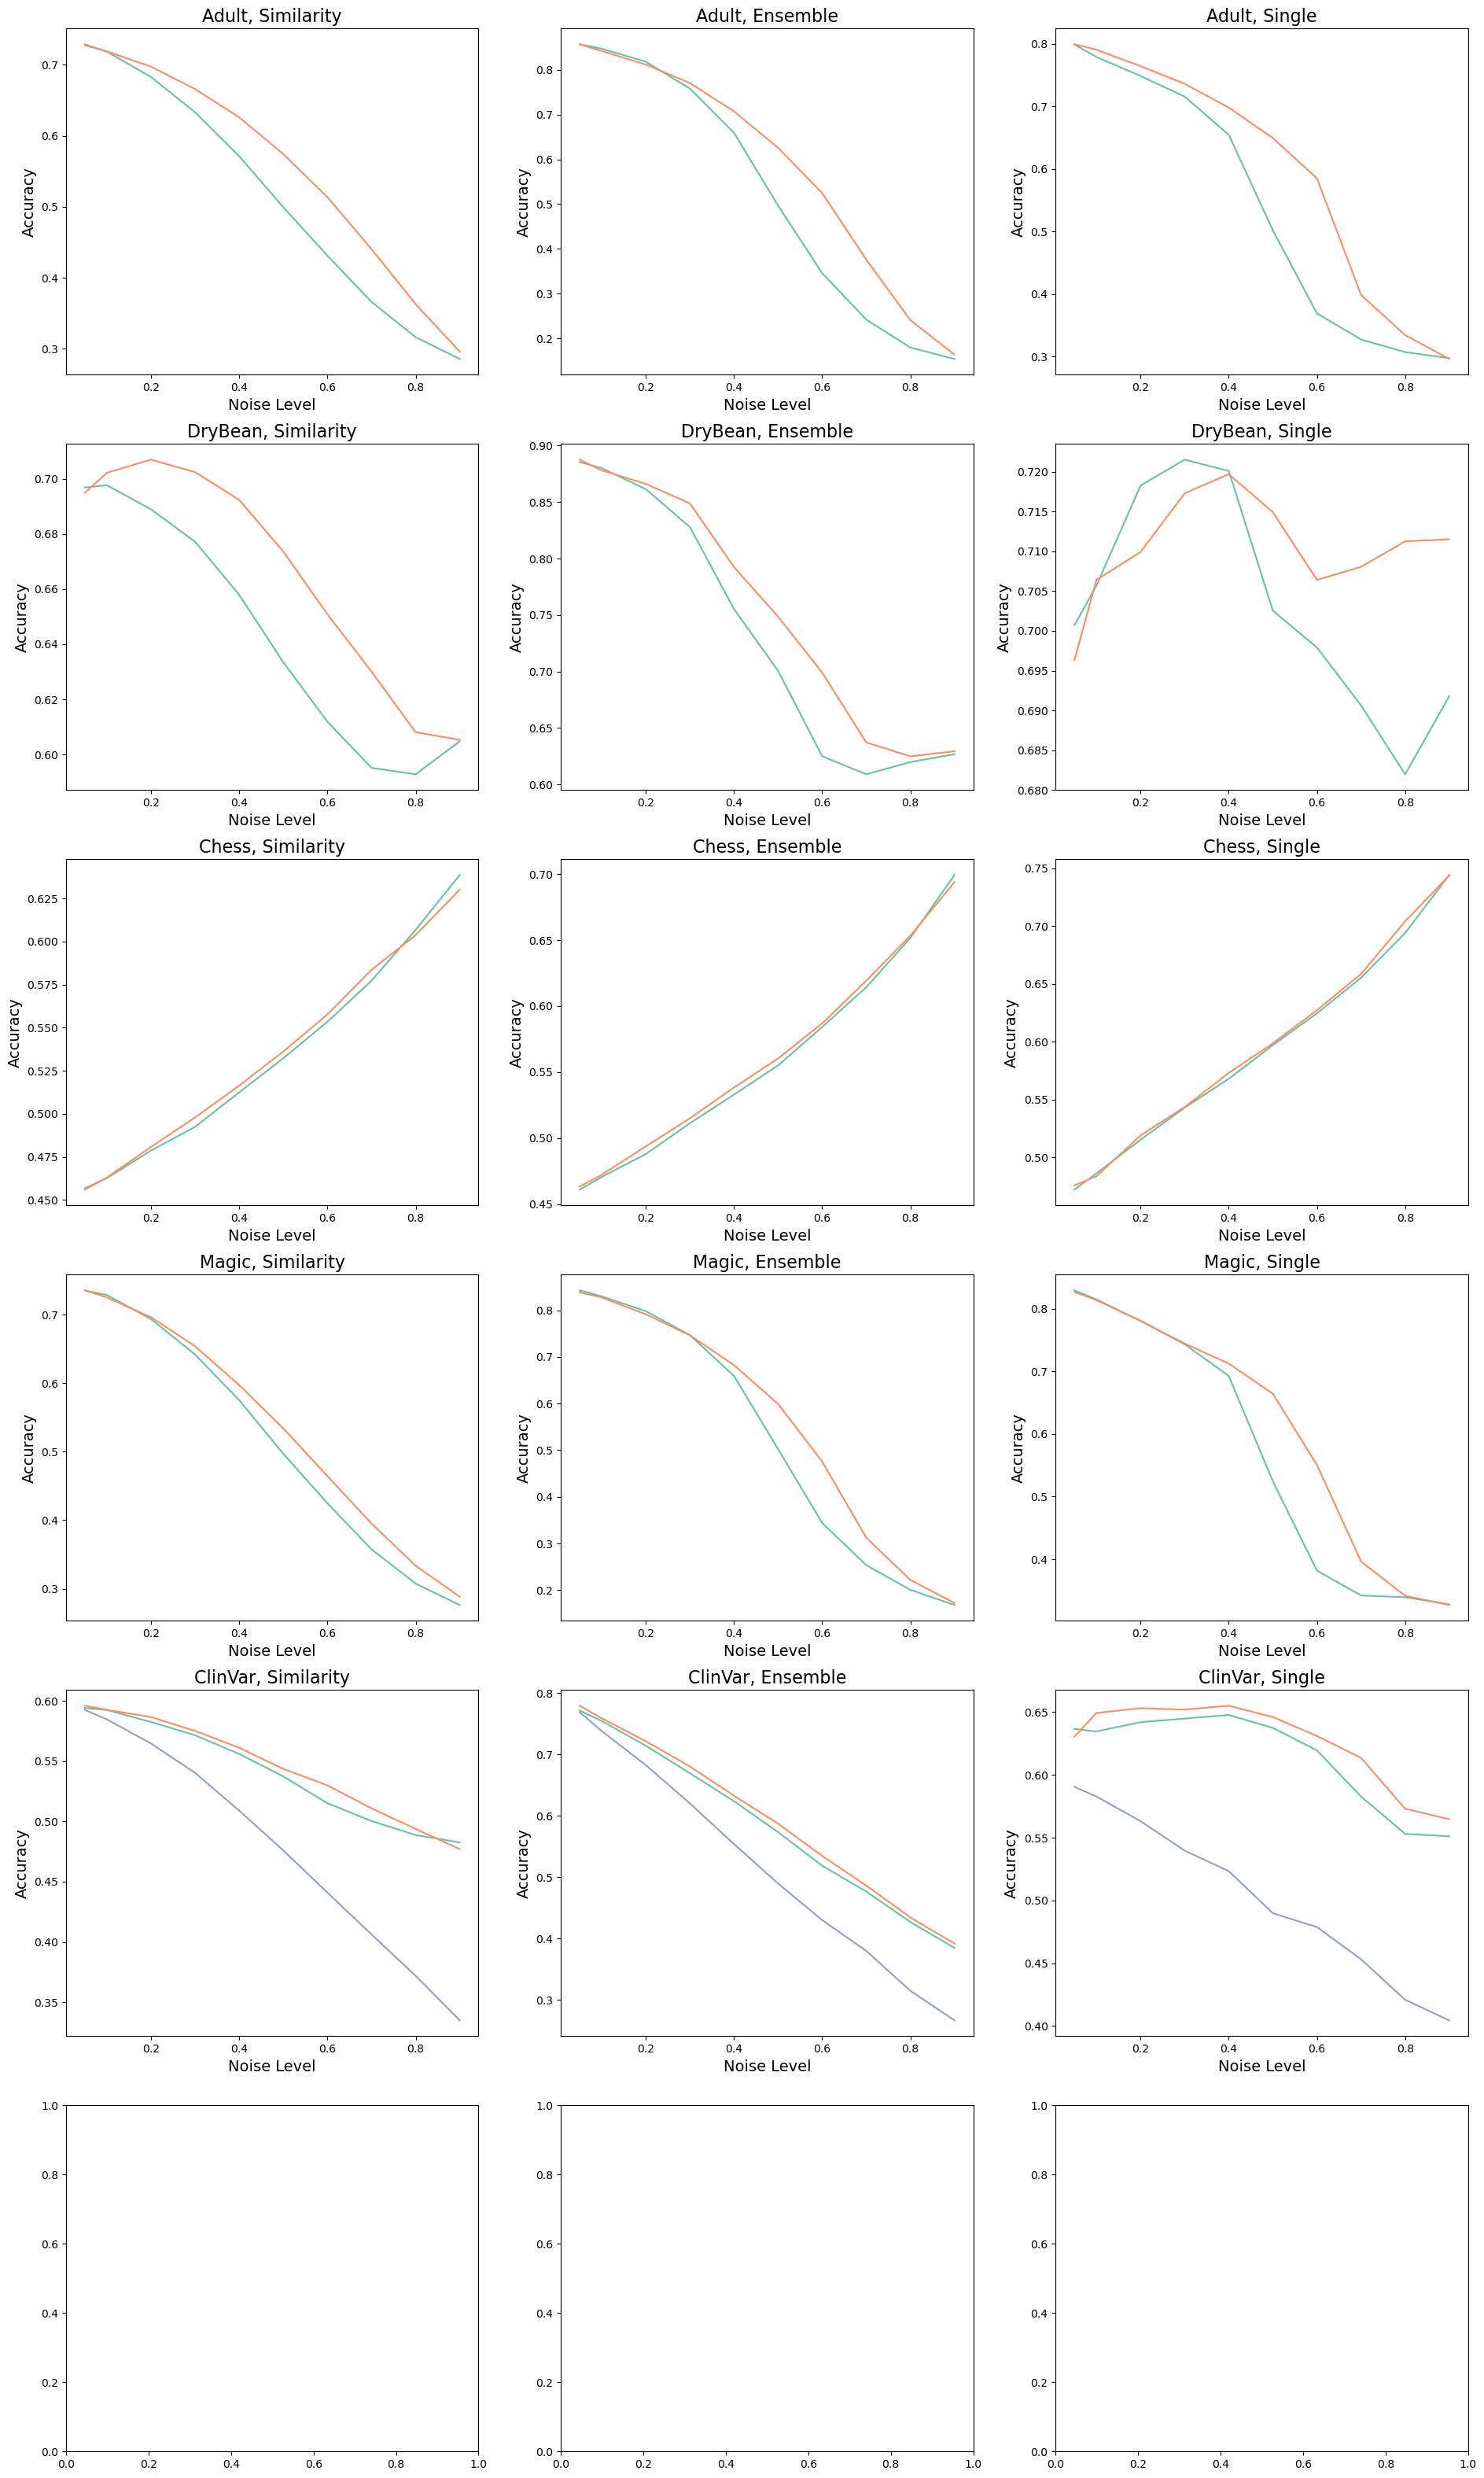

In [149]:
# Performance wrt noise type and noise level
variable = 'NoiseLevel'
Score = 'Accuracy'
DatasetSize = 10000
datasets = ["Adult","DryBean","Chess","Magic","ClinVar", "Encode"]
#datasets = ["DryBean","Adult","Magic","ClinVarArt", "EncodeArt"]

n = len(datasets)
#n = 2
NoiseTypes = ["Sym","Asym", "Real"]
#NoiseTypes = ["Sym"]

allScores = dfs

fig, axs = plt.subplots(n,3,figsize=(23,40))

for j,Dataset in enumerate(datasets[:n]):

    scores_raw = allScores[((allScores['Dataset'].str.contains(Dataset)) 
               
                           )]
    for noiseType in NoiseTypes:
        scores_ = scores_raw[scores_raw['NoiseType'] == noiseType]
        
        for i,group in enumerate(groups):  
            models = mod[mod['Group']==group]['Abbreviation']
            scores = scores_[scores_['Model'].isin(models)]
            table = scores.groupby('NoiseLevel').mean().reset_index()

            if len(table) > 0:
                axs[j,i].plot(table[variable],table[Score].astype(float),  label = noiseType)
                axs[j,i].set_title("{}, {}".format(Dataset, group), fontsize = 16 )
                axs[j,i].set_xlabel('Noise Level',fontsize = 14 )
                axs[j,i].set_ylabel(Score,fontsize = 14 )
                if j==n-1: 
                    axs[j,i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                      fancybox=True, shadow=True, ncol=4)
#plt.savefig('figures/'+Score+'_'+variable+'.png',transparent=False,bbox_inches = 'tight')


#### Comparison of symmetric, asymmetric noise and real aggregated over datasets 

In [65]:
allScores.shape

(226100, 29)

106400
106400
13300
106400
106400
13300
106400
106400
13300
106400
106400
106400
106400
106400
106400
13300
13300
13300
13300
13300
13300
13300
13300
13300


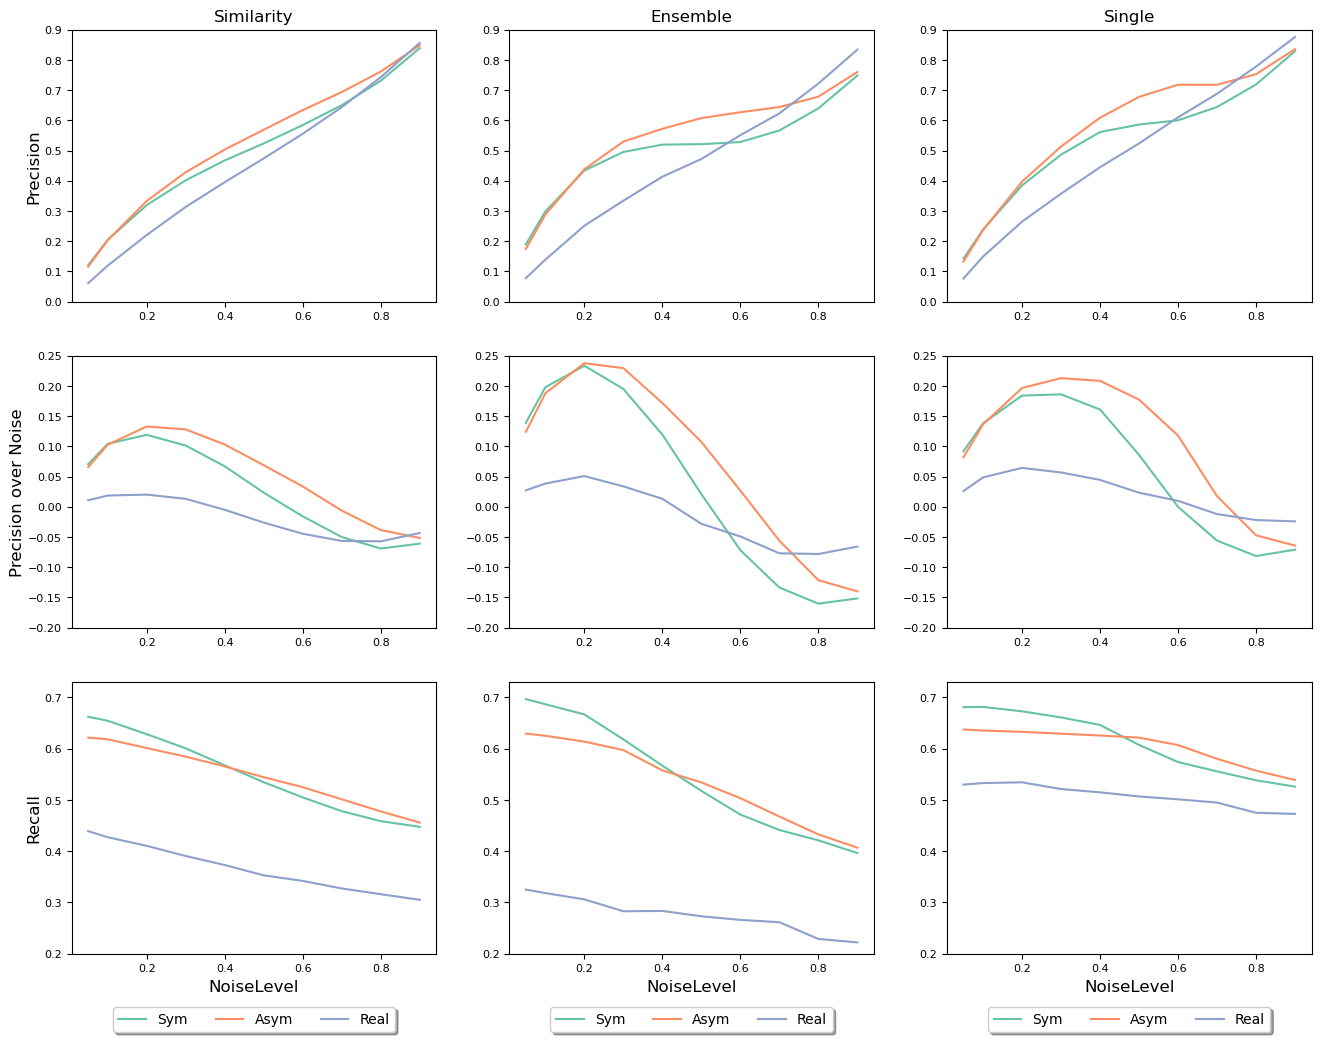

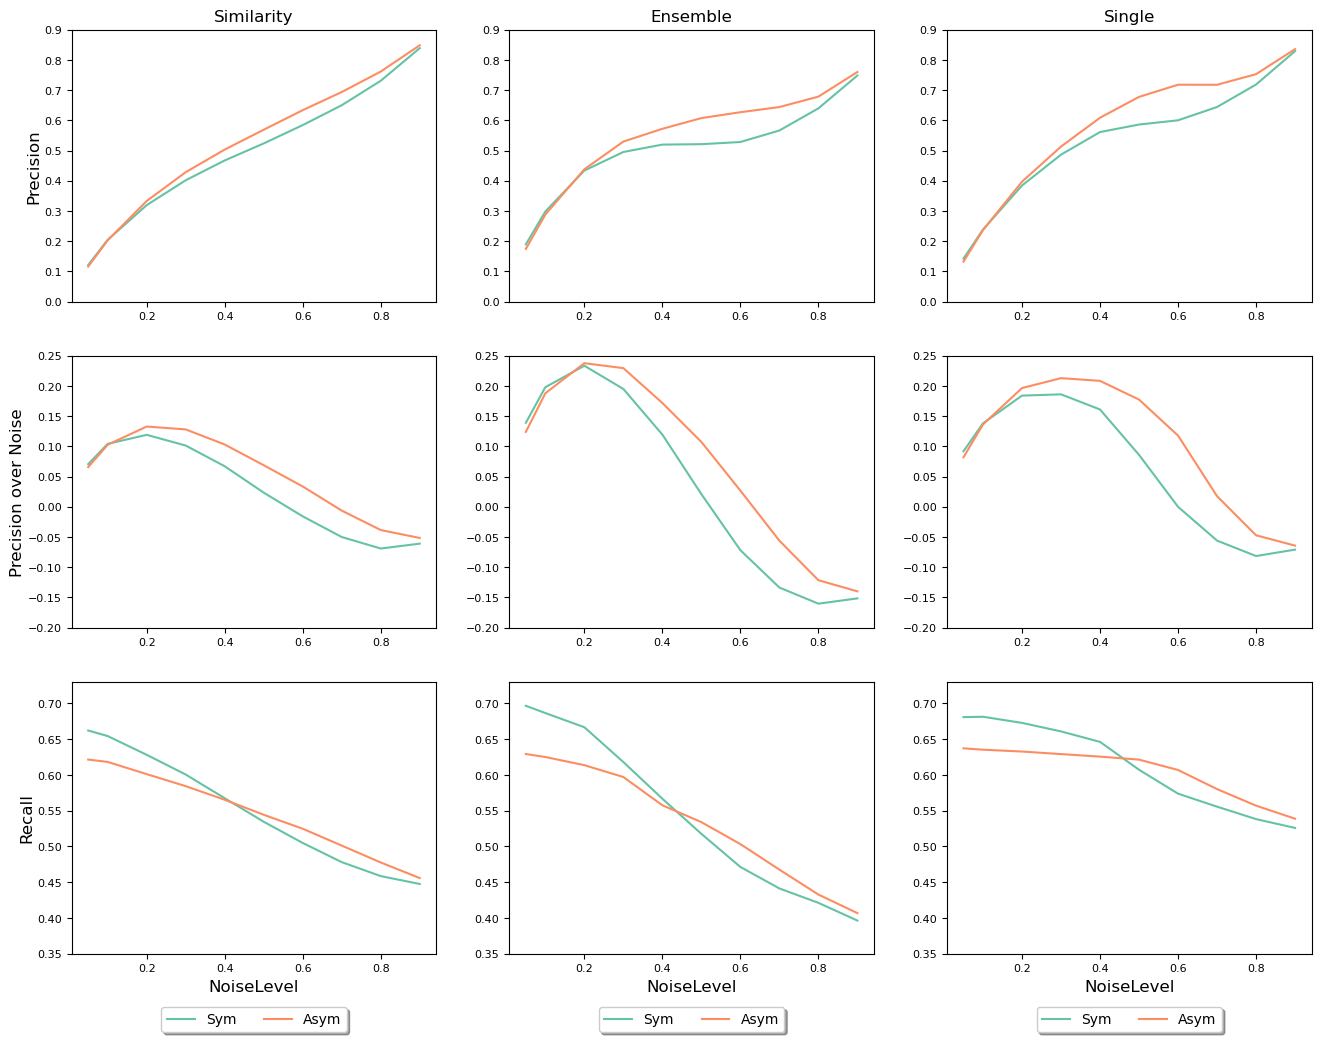

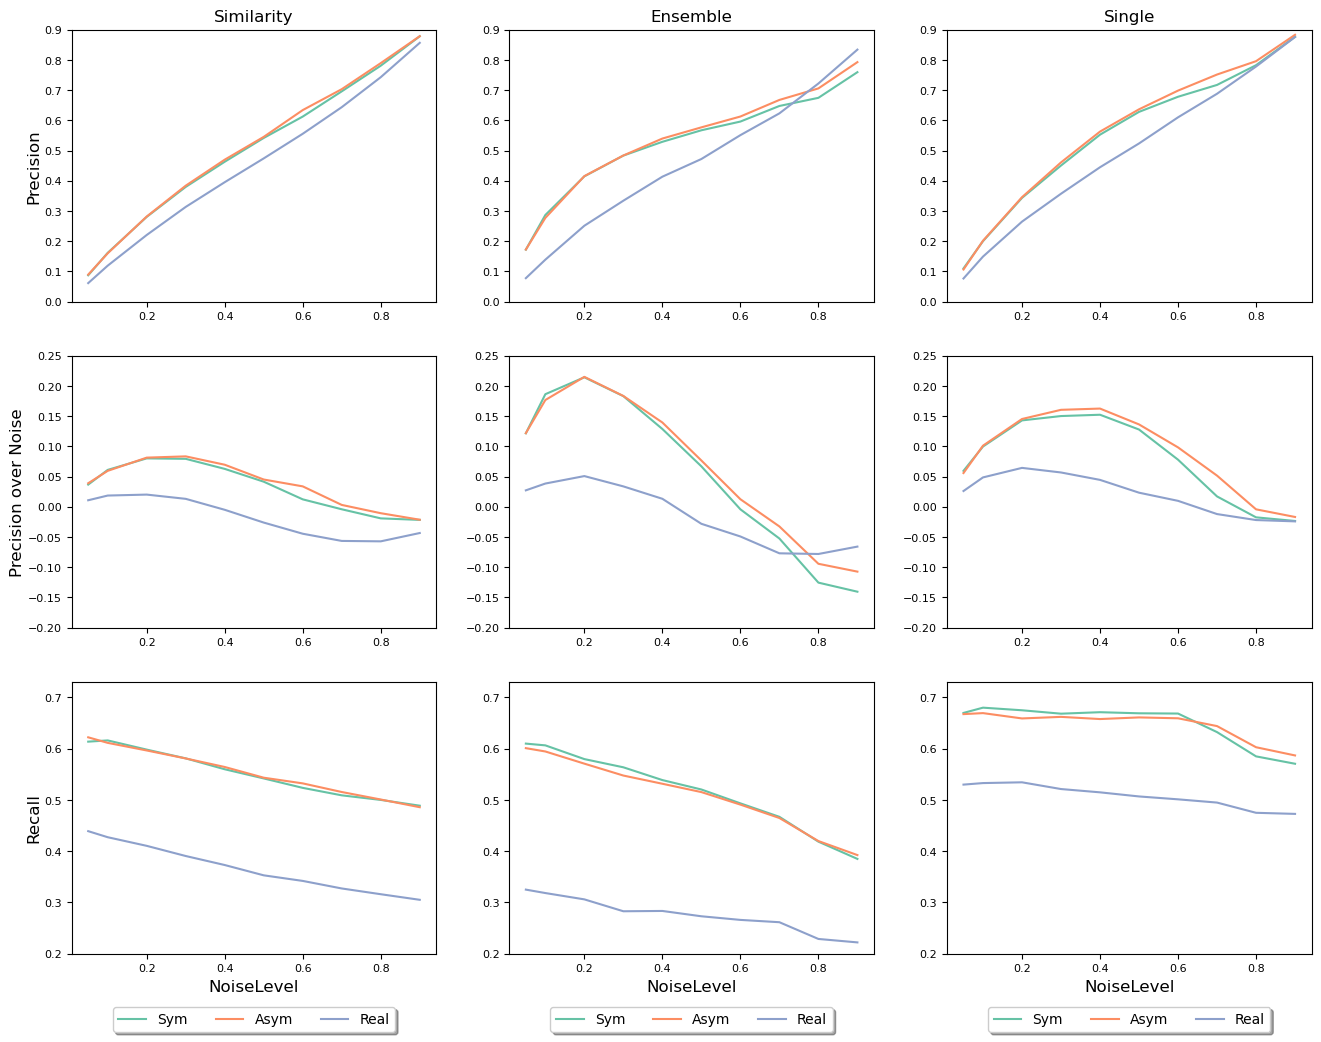

In [105]:
### Performance wrt dataset size and noise type
from matplotlib.ticker import FuncFormatter



variable = 'NoiseLevel'
n = len(NoiseTypes)
fontsize = 10

allNoiseTypes = ["Sym","Asym", "Real"]
twoNoiseTypes = ["Sym","Asym"]


allScores = dfs
clinVarScores = allScores[allScores['Dataset'].isin(['ClinVarReal','ClinVarArt'])]

ClinVarLim = [[0,0.9],[-0.2,0.25],[0.2,0.73]]
allLim = [[0,0.9],[-0.2,0.25],[0.35,0.73]]


di = {'NoiseTypeAll': [allScores,allNoiseTypes,ClinVarLim],
      'NoiseTypeAllW' : [allScores,twoNoiseTypes,allLim],
      'NoiseTypeClinVar' :[clinVarScores,allNoiseTypes,ClinVarLim]}



fs = 10
li = [
      'Precision',
    pon,
    'Recall'
     ]

for key in di.keys():
    fig, axs = plt.subplots(len(li),3,figsize=(16,4*len(li)))
    
    for j,Score in enumerate(li):

        scores_raw = di[key][0]
        NoiseTypes = di[key][1]
        lim = di[key][2]
        for noiseType in NoiseTypes:
            scores_ =scores_raw[scores_raw['NoiseType'] == noiseType]

          #  print(len(scores_))

            for i,group in enumerate(groups):  
                models = mod[mod['Group']==group]['Abbreviation']
                scores = scores_[scores_['Model'].isin(models)]

                table = scores.groupby(variable).mean().reset_index()

                if len(table) > 0:

                    if i==0:
                        axs[j,i].set_ylabel(Score,fontsize = fs+2, labelpad = 2 )

                    axs[j,i].plot(table[variable],table[Score].astype(float),  label = noiseType)
                    axs[j,i].tick_params(axis='both', which='major', labelsize=8)
                    if j==0: 
                        axs[j,i].set_title("{}".format(group), fontsize = fs+2 )

                    #if i==n-1: 
                    if j==len(li)-1: 
                        axs[j,i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.17),
              fancybox=True, shadow=True, ncol=3,fontsize = fs )
                        axs[j,i].set_xlabel(variable,fontsize = fs +2 )

                    axs[j,i].set_ylim(lim[j])

    name = key+ '.png'
    plt.savefig('figures/'+Score+'_'+variable+'NoiseTypes.png',transparent=False,bbox_inches = 'tight', dpi = 100)


In [ ]:
[[0,0.9],[-0.15,0.25],[0.4,0.7]]

In [66]:
scores_raw[scores_raw['NoiseType'] == noiseType]

Index Status  True Positive  \
213614   [ClinVarReal, AENN, 0.05, Real, 100, 0]      S              5   
217416   [ClinVarReal, AENN, 0.05, Real, 100, 3]      S              2   
214461   [ClinVarReal, AENN, 0.05, Real, 100, 1]      S              3   
215070   [ClinVarReal, AENN, 0.05, Real, 100, 0]      S              4   
217415   [ClinVarReal, AENN, 0.05, Real, 100, 2]      S              4   
...                                          ...    ...            ...   
67471   [ClinVarReal, RkDN, 0.9, Real, 10000, 1]      S           2682   
67474   [ClinVarReal, RkDN, 0.9, Real, 10000, 4]      S           2725   
64715   [ClinVarReal, RkDN, 0.9, Real, 10000, 1]      S           2518   
67248   [ClinVarReal, RkDN, 0.9, Real, 10000, 2]      S           2584   
67472   [ClinVarReal, RkDN, 0.9, Real, 10000, 2]      S           2579   

        False Positive  True Negative  False Negative  Execution Time  \
213614              61             34               0           9.358   
217416              41             54               3           5.525   
214461              48             47               2           4.863   
215070              50             45               1          10.543   
217415              47             48               1           4.943   
...                ...            ...             ...             ...   
67471              524            476            6318           1.993   
67474              504            496            6275           2.019   
64715              518            482            6482           1.119   
67248              490            510            6416           1.096   
67472              493            507            6421           1.995   

        Precision  Recall  F-score Extra Info      Dataset Model  NoiseLevel  \
213614      0.076   1.000    0.141        NaN  ClinVarReal  AENN       0.050   
217416      0.046   0.400    0.083        NaN  ClinVarReal  AENN       0.050   
214461      0.059   0.600    0.107        NaN  ClinVarReal  AENN       0.050   
215070      0.074   0.800    0.136        NaN  ClinVarReal  AENN       0.050   
217415      0.078   0.800    0.143        NaN  ClinVarReal  AENN       0.050   
...           ...     ...      ...        ...          ...   ...         ...   
67471       0.837   0.298    0.440        NaN  ClinVarReal  RkDN       0.900   
67474       0.844   0.303    0.446        NaN  ClinVarReal  RkDN       0.900   
64715       0.829   0.280    0.418        NaN  ClinVarReal  RkDN       0.900   
67248       0.841   0.287    0.428        NaN  ClinVarReal  RkDN       0.900   
67472       0.840   0.287    0.427        NaN  ClinVarReal  RkDN       0.900   

       NoiseType  DatasetSize  Sample       Group  Precision over Noise  \
213614      Real          100       0  Similarity                 0.026   
217416      Real          100       3  Similarity                -0.004   
214461      Real          100       1  Similarity                 0.009   
215070      Real          100       0  Similarity                 0.024   
217415      Real          100       2  Similarity                 0.028   
...          ...          ...     ...         ...                   ...   
67471       Real        10000       1  Similarity                -0.063   
67474       Real        10000       4  Similarity                -0.056   
64715       Real        10000       1  Similarity                -0.071   
67248       Real        10000       2  Similarity                -0.059   
67472       Real        10000       2  Similarity                -0.060   

        RecallOverNoise  Accuracy  Subjective noise level  Cost  Cost-mod  \
213614            0.950     0.390                   0.660 0.660    13.200   
217416            0.350     0.560                   0.430 1.075    21.500   
214461            0.550     0.500                   0.510 0.850    17.000   
215070            0.750     0.490                   0.540 0.675    13.500   
217415            0.750     0.

#### Bar plot of average noise type for different datasets

In [152]:
df1 = dfs[dfs['NoiseType']=='Asym']
df1 = df1.groupby(['Dataset'])[['Precision',pon]].mean()
df2 = dfs[dfs['NoiseType']=='Sym']
df2 = df2.groupby(['Dataset'])[['Precision',pon]].mean()
df3 = dfs[dfs['NoiseType']=='Real']
df3 = df3.groupby(['Dataset'])[['Precision',pon]].mean()

In [153]:
dfs[(dfs['NoiseType']=='Real')&(dfs['Dataset']=='ClinVarReal')][pon].mean()



-0.015406304474143056

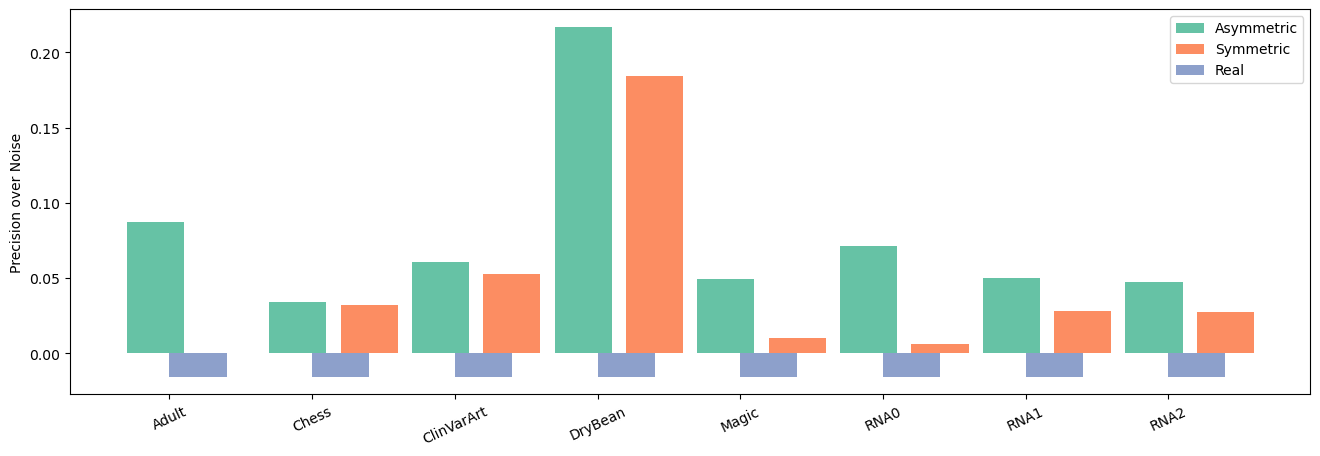

In [154]:
df = dfs.groupby(['Dataset','NoiseType'])[['Precision',pon]].mean()

fig = plt.figure(figsize=(16,5
                         ))
ax = fig.add_subplot(111)
indices = np.array(list(range(len(df1))))
width = np.min(np.diff(indices))/2 -0.1
#label = 'F-score'
# matplotlib 3.0 you have to use align
label = pon
ax.bar(indices-width,df1[pon],width,align='edge',
       label = 'Asymmetric')
ax.bar(indices+0.1,df2[pon],width,align='edge',
       label = 'Symmetric',)
ax.bar(indices-0.1,df3[pon],width,align='edge',
       label = 'Real',)

plt.xticks(indices-0.1, df1.index.to_list(), fontsize = fs,rotation=25)
plt.yticks(fontsize = fs)
plt.ylabel(label,fontsize = fs)
plt.legend()
#plt.savefig('figures/'+label+'.png',transparent=False,bbox_inches = 'tight')


#plt.savefig('figures/'+label+'OverDatasets.png',transparent=False,bbox_inches = 'tight')



#### Pivot table (heatmap) of  model performance vs. sample

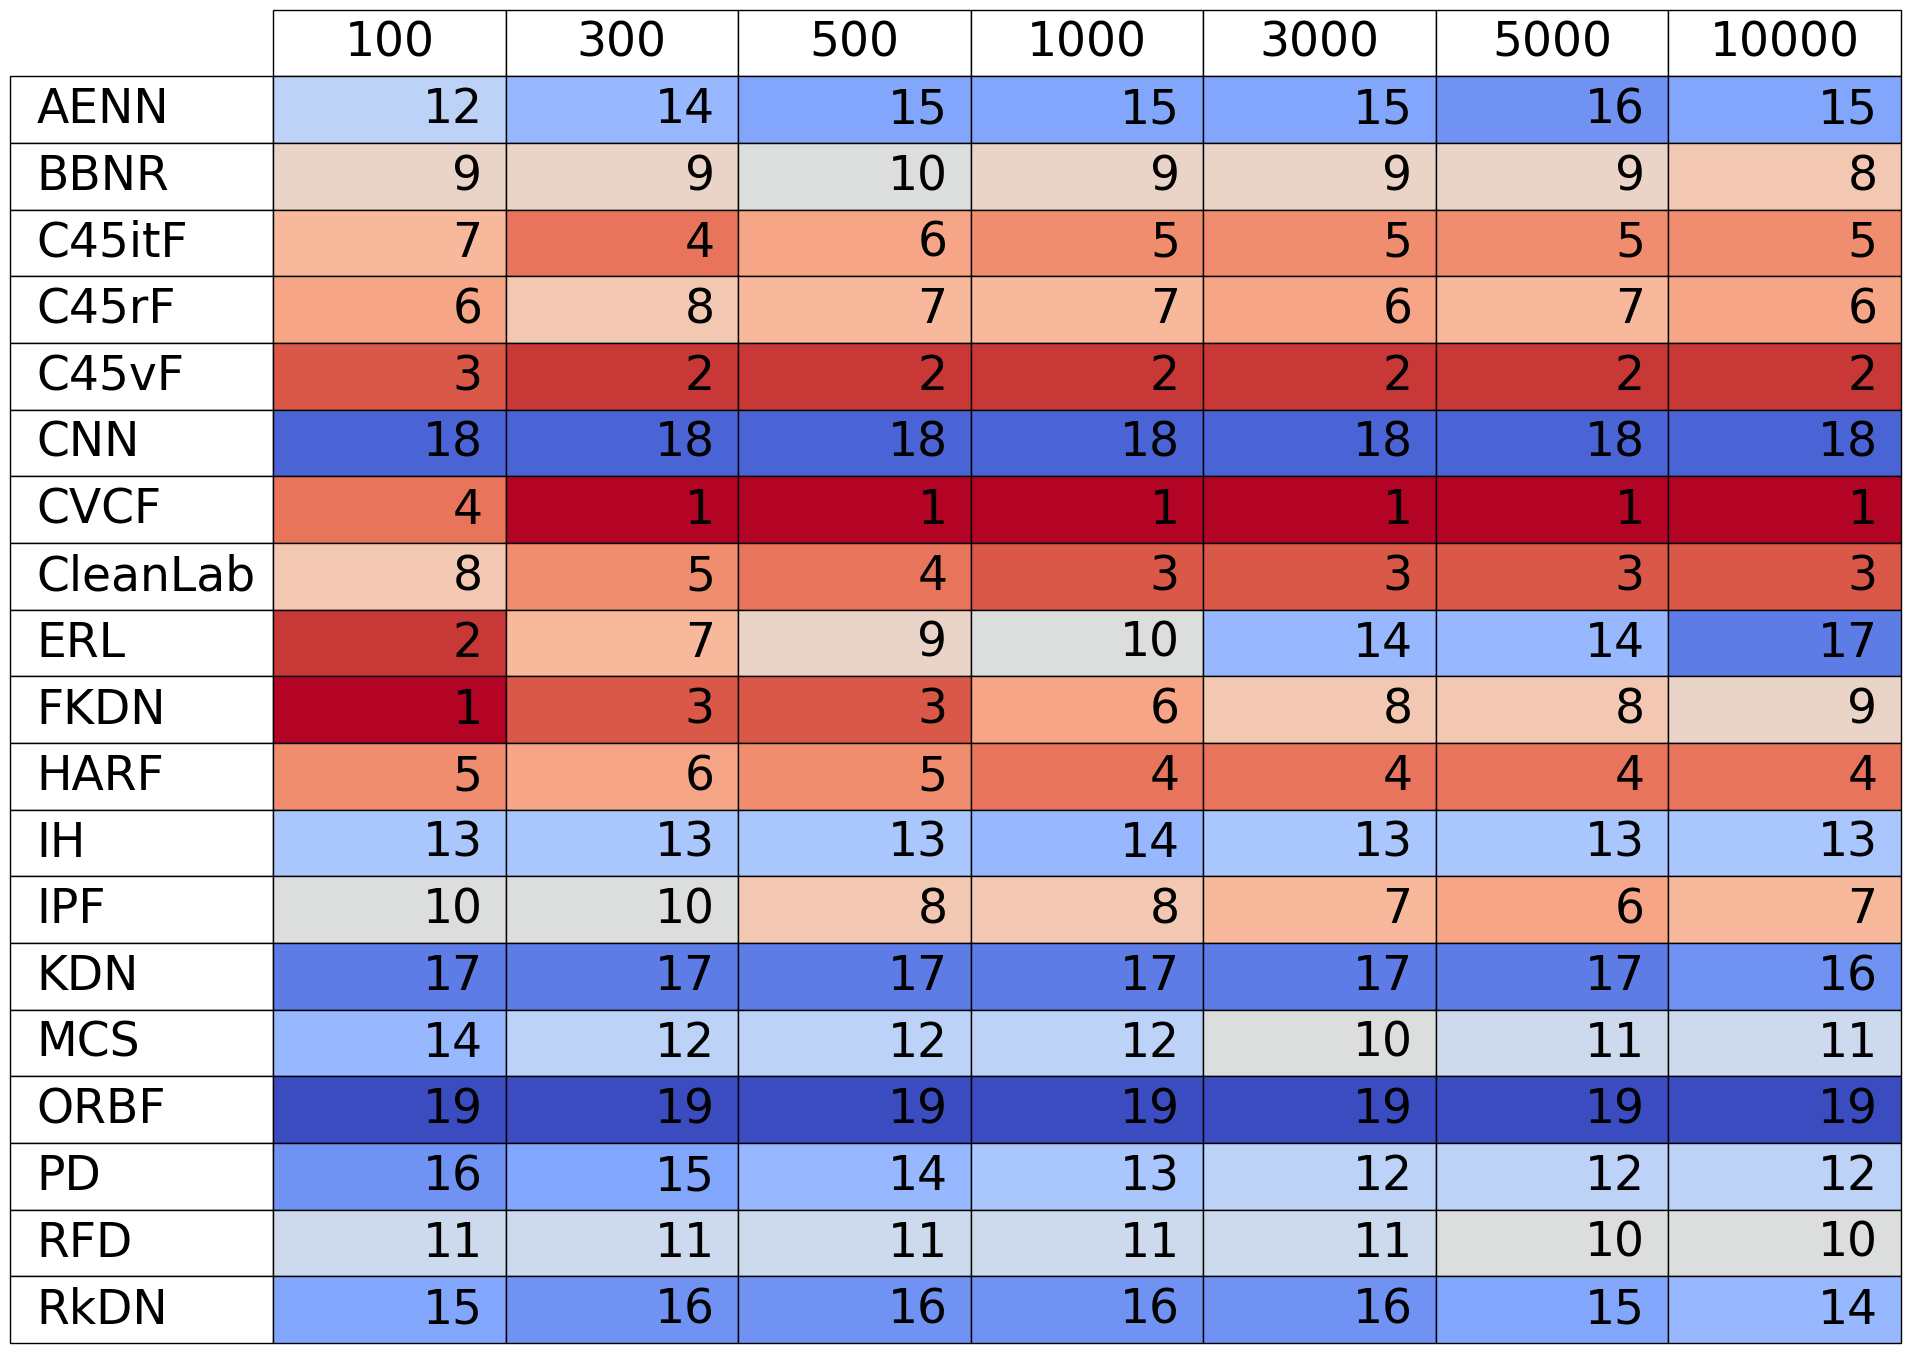

In [155]:
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *


cols = [0.05, 0.1, 0.2, 0.3, 0.4,  0.5, 0.6, 0.7]
#cols = datasets
Score = pon
variable = 'DatasetSize'
#variable = 'Execution Time'
#idx = Index(np.arange(1,11))
#df = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])

scores = allScores

df = scores.pivot_table(values=Score, index='Model', columns=variable, aggfunc='mean')
df = df.rank(ascending = False)
#df.columns = cols
df= df.astype(float).round(4)
df= df.astype(int)

vals = df.values# np.around(df.values,4)
Min=vals.astype(float).min().min()
Max=vals.astype(float).max().max()
norm = plt.Normalize(Min-1, Max+1)
#norm = plt.Normalize(0, 1)
cmap = plt.get_cmap('coolwarm_r')

colours = cmap(norm(vals))

colores = np.zeros((vals.shape[0], vals.shape[1], 4))
#cmap = plt.get_cmap('viridis')
#cmap = plt.get_cmap('hot')

for i in range(vals.shape[1]):
    col_data = pd.Series(vals[:, i])
    #normal = plt.Normalize(np.min(col_data), np.max(col_data))
    #colores[:, i]  = cmap(norm(col_data))
    a = ((col_data -col_data.min())/(col_data.max() - col_data.min())).to_numpy()
    a = np.ma.masked_array(a)
    colores[:, i] = cmap(a)


fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

ytable=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.2]*vals.shape[1]
                  #  colHeights = [0.2]*vals.shape[0]
                    , loc='center', 
                    cellColours=colores)
ytable.set_fontsize(34)
ytable.scale(1, 4)
#plt.savefig('figures/ModelvsDataset'+variable+'.png',transparent=False,bbox_inches = 'tight'                   )

plt.show()


In [56]:
dfs.groupby(['Group','Model']).mean()#.sort_values('Precision')

True Positive  False Positive  True Negative  \
Group      Model                                                    
Ensemble   C45itF         773.9173        483.5163      1065.8408   
           C45vF          429.8326        270.2313      1279.1258   
           CVCF           392.0015        242.6363      1306.7208   
           HARF           566.7251        333.7975      1215.5597   
           IH             914.9952        767.9181       781.4391   
           IPF            766.0781        524.8708      1024.4863   
           ORBF           270.2612        279.8897      1269.4675   
           PD             823.7329        652.7066       896.6505   
           RFD            881.0664        669.0913       880.2658   
Similarity AENN           805.3981        692.1299       857.2272   
           BBNR           450.0323        379.2122      1170.1450   
           CNN            311.4600        570.0012       979.3560   
           FKDN           764.2270        545.3948      1003.9624   
           KDN            875.3672        804.6225       744.7346   
           RkDN           810.1113        727.8767       821.4804   
Single     C45rF          741.5044        476.3169      1073.0403   
           CleanLab       598.6351        407.9529      1141.4043   
           ERL            887.8469        643.3093       906.0478   
           MCS            837.2508        722.8041       826.5530   

                     False Negative  Execution Time  Precision  Recall  \
Group      Model                                                         
Ensemble   C45itF          519.5827         42.0841     0.5541  0.5755   
           C45vF           863.6674          3.7852     0.5755  0.3253   
           CVCF            901.4985          3.8049     0.5825  0.3010   
           HARF            726.7749         23.6749     0.5599  0.5104   
           IH              378.5048          7.6705     0.5067  0.7467   
           IPF             527.4219          7.9530     0.5384  0.6310   
           ORBF           1023.2388         23.9593     0.2361  0.2345   
           PD              469.7671          0.0323     0.5091  0.6790   
           RFD             412.4336          1.2871     0.5151  0.7381   
Similarity AENN            488.1019        588.0457     0.5011  0.6738   
           BBNR            843.4677        202.1817     0.5344  0.4176   
           CNN             982.0400        274.3677     0.3961  0.2031   
           FKDN            529.2730          1.8185     0.5511  0.5533   
           KDN             418.1328          0.2989     0.4860  0.7252   
           RkDN            483.3887          0.3632     0.4902  0.6718   
Single     C45rF           551.9956          7.3814     0.5458  0.5532   
           CleanLab        694.8649          2.8144     0.5556  0.5288   
           ERL             405.6531         31.3010     0.5290  0.6478   
           MCS             456.2492          1.0269     0.5108  0.6903   

                     F-score  NoiseLevel  DatasetSize  Sample  \
Group      Model                                                
Ensemble   C45itF     0.5089      0.4550    2842.8571  1.6352   
           C45vF      0.3467      0.4550    2842.8571  1.6489   
           CVCF       0.3303      0.4550    2842.8571  1.6487   
           HARF       0.4596      0.4550    2842.8571  1.6800   
           IH         0.5465      0.4550    2842.8571  1.5994   
           IPF        0.5265      0.4550    2842.8571  1.6609   
           ORBF       0.2029      0.4550    2842.8571  1.5439   
           PD         0.5232      0.4550    2842.8571  1.6247   
           RFD        0.5520      0.4550    2842.8571  1.6288   
Similarity AENN       0.5195      0.4550    2842.8571  1.6271   
           BBNR       0.4074      0.4550    2842.8571  1.6796   
           CNN        0.2293      0.4550    2842.8571  1.6689   
           FKDN       0.4810      0.4550    2842.8571  1.6474   
           KDN        0.5221      0.4550 

#### Pivot table (heatmap) of  model performance vs. all averaged scores

/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_74578/1880934546.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


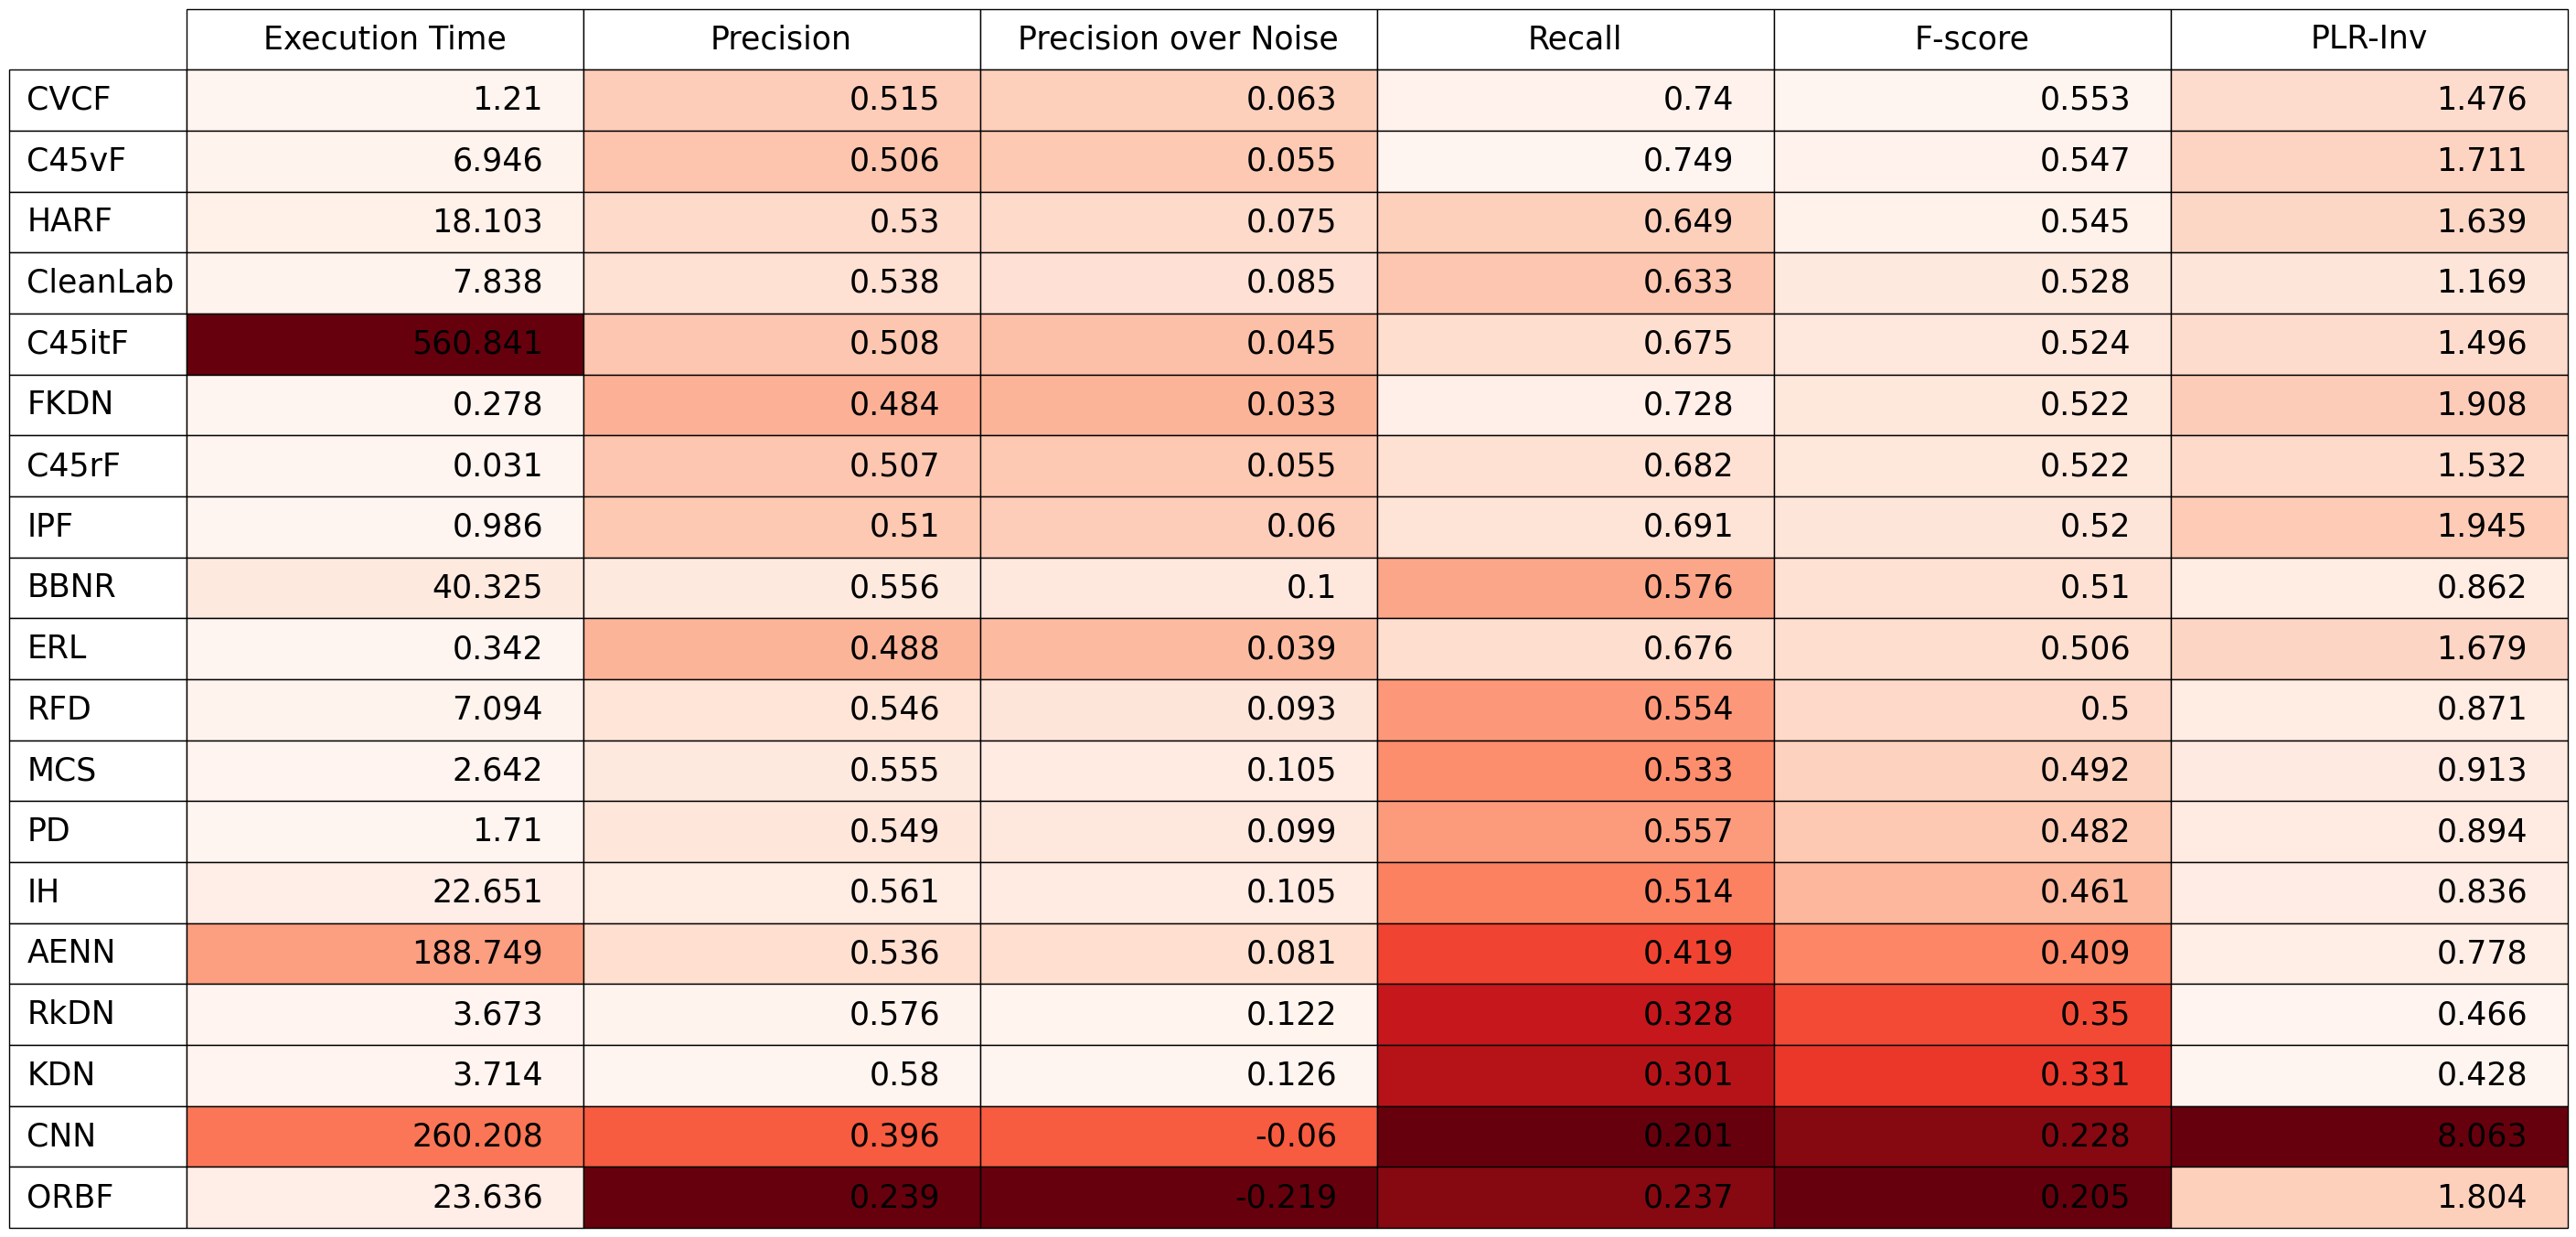

In [156]:
import matplotlib.cm as cm
#fig = plt.figure(figsize=(15,8))
#a = dfs[dfs['DatasetSize']==10000]
a = dfs
means = a.groupby('Model').mean().sort_values(pon, ascending = False)
means
fig, ax = plt.subplots(figsize=(28,4))

columns=['Execution Time','Precision',pon,'Recall','F-score', 'PLR-Inv']

conf_data = means[columns].round(3).to_numpy()

conf_data = pd.DataFrame(conf_data).sort_values(4, ascending = False).to_numpy()
colores = np.zeros((conf_data.shape[0], conf_data.shape[1], 4))
cmap = plt.get_cmap('viridis')

cmap = plt.get_cmap('Reds').reversed()

for i in range(conf_data.shape[1]):
    
    col_data = pd.Series(conf_data[:, i])
    normal = plt.Normalize(np.min(col_data), np.max(col_data))
    #colores[:, i]  = cmap(norm(col_data))
    a = ((col_data -col_data.min())/(col_data.max() - col_data.min())).to_numpy()
    a = np.ma.masked_array(a)
    if i in  [0,len(columns)-1]:
        colores[:, i] =  cmap.reversed()(a)
    else:
        colores[:, i] = cmap(a)


#col_data = pd.Series(conf_data[:, 0])
#a = ((col_data -col_data.min())/(col_data.max() - col_data.min())).to_numpy()
#colores[:, 0] = cmap(a)

rows = means.index.to_list()

ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=conf_data.round(3),
         rowLabels=rows,
         colLabels=columns,
         cellColours=colores,
         loc='center',
         colWidths=[0.2]*len(columns),
        )
table.set_fontsize(34)
table.scale(1, 4)
fig.tight_layout()
plt.savefig('figures/heatmap_table_means_over_everything.png',transparent=False,bbox_inches = 'tight'                   )

plt.show()